In [1]:
from sequenzo import *
import pandas as pd
import numpy as np
import hdbscan

family_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/family_15_35.csv')
happiness_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/happiness_15_35.csv')

family_mapping = {
    1: "Single",
    2: "Romantic Partner",
    3: "Married"
}

# ÊõøÊç¢ time columnsÔºà15~35Ôºâ‰∏∫ label
time_cols = [str(i) for i in range(15, 36)]
family_df[time_cols] = family_df[time_cols].replace(family_mapping)

happiness_mapping = {
    1: "Unhappy",
    2: "Somewhat unhappy",
    3: "Neutral",
    4: "Somewhat happy",
    5: "Happy"
}

happiness_df[time_cols] = happiness_df[time_cols].replace(happiness_mapping)

# --------------

time_cols = []

for i in list(range(15, 36)):
    time_cols.append(str(i))
    
family_colors = ["#D1C2D3", "#C4473D", "#574266"]
    
family_sequence = SequenceData(data=family_df,
                               time_type='age',
                               time=time_cols,
                               states=["Single", "Romantic Partner", "Married"],
                               custom_colors=family_colors)

happiness_colors = ["#4263A3", "#8AB7C5", "#D6DEE9", "#E0BA19", "#C69519"]

happiness_sequence = SequenceData(data=happiness_df,
                                  time_type='age',
                                  time=time_cols,
                                  states=["Unhappy", "Somewhat unhappy", "Neutral", "Somewhat happy", "Happy"],
                                  custom_colors=happiness_colors)

# family_sequence = SequenceData(data=family_df,
#                                time_type='age',
#                                time=time_cols,
#                                states=[1, 2, 3],
#                                labels=["Single", "Romantic Partner", "Married"])
# 
# happiness_sequence = SequenceData(data=happiness_df,
#                                   time_type='age',
#                                   time=time_cols,
#                                   states=[1, 2, 3, 4, 5],
#                                   labels=["Unhappy", "Somewhat unhappy", "Neutral", "Somewhat happy", "Happy"])

distance_matrix_family = get_distance_matrix(seqdata=family_sequence,
                                             method='OM',
                                             norm='auto',
                                             sm="CONSTANT",
                                             indel=1)

distance_matrix_happiness = get_distance_matrix(seqdata=happiness_sequence,
                                                method='OM',
                                                norm='auto',
                                                sm="CONSTANT",
                                                indel=1)


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: ['Single', 'Romantic Partner', 'Married']

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: ['Unhappy', 'Somewhat unhappy', 'Neutral', 'Somewhat happy', 'Happy']
[>] Processing 1538 sequences with 3 unique states.
  - Creating 4x4 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 859 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.
[>] Processing 1538 sequences with 5 unique states.
  - Creating 6x6 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 895 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computi

In [2]:
happiness_df

ID              15              16              17              18  \
0        1  Somewhat happy  Somewhat happy  Somewhat happy  Somewhat happy   
1        2         Neutral         Neutral         Neutral           Happy   
2        5           Happy           Happy           Happy           Happy   
3        6         Neutral         Neutral         Neutral         Neutral   
4        7         Neutral         Neutral         Neutral         Neutral   
...    ...             ...             ...             ...             ...   
1533  1992         Neutral         Neutral         Neutral         Neutral   
1534  1995           Happy           Happy           Happy           Happy   
1535  1996  Somewhat happy  Somewhat happy  Somewhat happy  Somewhat happy   
1536  1997  Somewhat happy  Somewhat happy  Somewhat happy  Somewhat happy   
1537  1999  Somewhat happy  Somewhat happy  Somewhat happy  Somewhat happy   

                  19              20                21                22  \
0     Somewhat happy           Happy             Happy             Happy   
1            Neutral           Happy           Neutral           Neutral   
2              Happy           Happy             Happy             Happy   
3            Neutral         Neutral  Somewhat unhappy  Somewhat unhappy   
4            Neutral         Neutral           Neutral           Neutral   
...              ...             ...               ...               ...   
1533         Neutral         Neutral           Neutral           Neutral   
1534           Happy           Happy             Happy    Somewhat happy   
1535  Somewhat happy  Somewhat happy             Happy             Happy   
1536  Somewhat happy  Somewhat happy    Somewhat happy    Somewhat happy   
1537  Somewhat happy  Somewhat happy    Somewhat happy    Somewhat happy   

           23  ...                26                27                28  \
0       Happy  ...             Happy             Happy             Happy   
1     Neutral  ...    Somewhat happy           Neutral           Neutral   
2       Happy  ...    Somewhat happy    Somewhat happy    Somewhat happy   
3     Neutral  ...           Neutral           Neutral           Neutral   
4     Neutral  ...           Neutral           Neutral           Neutral   
...       ...  ...               ...               ...               ...   
1533  Neutral  ...           Neutral           Neutral           Neutral   
1534  Neutral  ...           Unhappy           Unhappy           Unhappy   
1535    Happy  ...             Happy    Somewhat happy    Somewhat happy   
1536    Happy  ...    Somewhat happy    Somewhat happy    Somewhat happy   
1537  Neutral  ...  Somewhat unhappy  Somewhat unhappy  Somewhat unhappy   

                    29                30                31                32  \
0                Happy             Happy             Happy             Happy   
1              Neutral           Neutral           Neutral    Somewhat happy   
2       Somewhat happy    Somewhat happy           Neutral    Somewhat happy   
3              Neutral           Neutral           Neutral  Somewhat unhappy   
4              Neutral           Neutral           Neutral           Neutral   
...                ...               ...               ...               ...   
1533           Neutral           Neutral           Neutral           Neutral   
1534             Happy             Happy             Happy    Somewhat happy   
1535    Somewhat happy    Somewhat happy    Somewhat happy    Somewhat happy   
1536    Somewhat happy    Somewhat happy    Somewhat happy    Somewhat happy   
1537  Somewhat unhappy  Somewhat unhappy  Somewhat unhappy  Somewhat unhappy   

                    33                34                35  
0                Happy             Happy             Happy  
1       Somewhat happy    Somewhat happy    Somewhat happy  
2                Happy             Happy             Happy  
3     Somewhat unhappy           Neutral

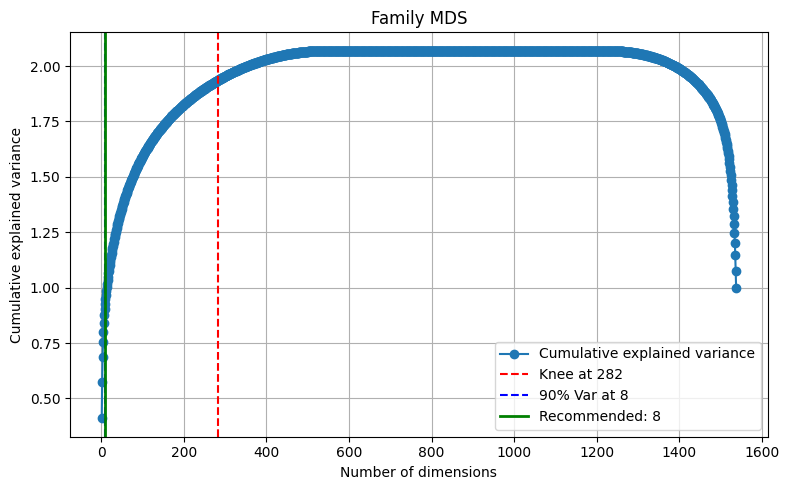

ÊúÄÁªàÊé®ËçêÁª¥Â∫¶ÔºàFamilyÔºâÔºö 154


In [3]:
# MDS Â§ÑÁêÜ
X_family, eigvals_family = cmdscale(distance_matrix_family)

# ËÆ°ÁÆóËß£ÈáäÊñπÂ∑Æ
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# Ëá™Âä®ÈÄâÊã©Áª¥Â∫¶
result_family = find_optimal_mds_dimension(
    cum_explained,
    title='Family MDS',
    var_threshold=0.90,
    max_dim=200
)

optimal_dim_family = result_family['recommended']
print("ÊúÄÁªàÊé®ËçêÁª¥Â∫¶ÔºàFamilyÔºâÔºö", 154)

# Ëé∑ÂèñÊúÄÁªàÂµåÂÖ•Áü©Èòµ
# X_family_optimal = X_family[:, :optimal_dim_family]
X_family_optimal = X_family[:, :282]

# TODOÔºöÈÄâÊã©‰∏ÄÁôæÂ§öÁöÑÁª¥Â∫¶ÂÜçËØïËØïÁúãÔºÅÔºÅÔºÅÔºÅ

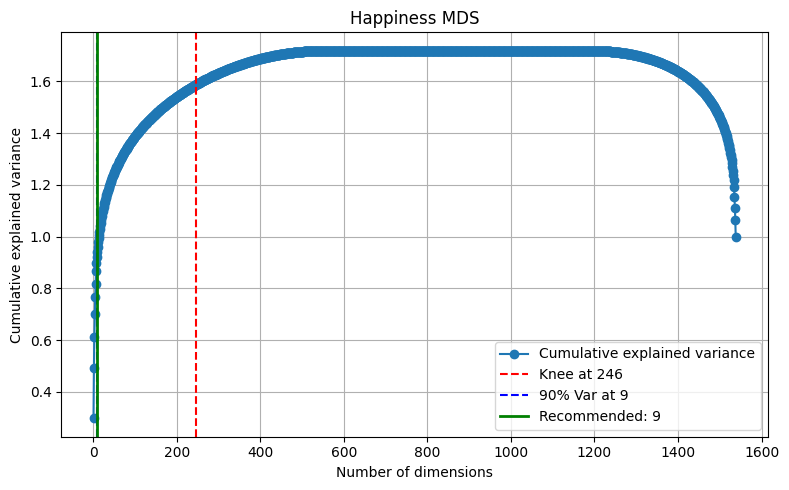

ÊúÄÁªàÊé®ËçêÁª¥Â∫¶ÔºàHappinessÔºâÔºö 9


In [4]:
# MDS Â§ÑÁêÜ
X_happiness, eigvals_family = cmdscale(distance_matrix_happiness)

# ËÆ°ÁÆóËß£ÈáäÊñπÂ∑Æ
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# Ëá™Âä®ÈÄâÊã©Áª¥Â∫¶
result_happiness = find_optimal_mds_dimension(
    cum_explained,
    title='Happiness MDS',
    var_threshold=0.90,
    max_dim=100
)

optimal_dim_happiness = result_happiness['recommended']
print("ÊúÄÁªàÊé®ËçêÁª¥Â∫¶ÔºàHappinessÔºâÔºö", optimal_dim_happiness)

# Ëé∑ÂèñÊúÄÁªàÂµåÂÖ•Áü©Èòµ
# X_happiness_optimal = X_happiness[:, :optimal_dim_happiness]
X_happiness_optimal = X_happiness[:, :246]

In [5]:
# Ëé∑ÂèñÊúÄÁªàÂµåÂÖ•Áü©Èòµ
X_concat = np.hstack([X_family_optimal, X_happiness_optimal])

X_concat

array([[ 0.43517119,  0.4848114 , -0.1081768 , ..., -0.01426059,
        -0.01654761, -0.00795521],
       [-0.00801619, -0.38782514,  0.15337688, ...,  0.02256234,
        -0.00622661,  0.05663371],
       [ 0.40564192, -0.62276974,  0.03838032, ..., -0.00837668,
        -0.01770728,  0.00541184],
       ...,
       [ 0.36733092,  0.42318198, -0.36475079, ..., -0.04626579,
         0.03179986, -0.01224732],
       [ 0.13966591,  0.74834773, -0.12558048, ...,  0.03532763,
        -0.00761127,  0.05058099],
       [ 0.16052912,  0.68043827, -0.17386576, ...,  0.02605313,
         0.00556627, -0.02320529]])

## Cluster analysis

In [6]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
cluster_labels = clusterer.fit_predict(X_concat)

# Áúã‰∏Ä‰∏ãËÅö‰∫ÜÂá†‰∏™ cluster
print(np.unique(cluster_labels, return_counts=True))

/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(array([-1,  0,  1]), array([1270,   40,  228]))


In [7]:
# ÊûÑÂª∫ DataFrame Áî®‰∫é plot
hdbscan_df = pd.DataFrame({
    "ID": family_df["ID"],
    "Cluster ID": cluster_labels
})

hdbscan_df

ID  Cluster ID
0        1          -1
1        2          -1
2        5          -1
3        6          -1
4        7          -1
...    ...         ...
1533  1992           1
1534  1995          -1
1535  1996          -1
1536  1997          -1
1537  1999          -1

[1538 rows x 2 columns]

In [8]:
hdbscan_df.to_csv('hdbscan_df.csv')

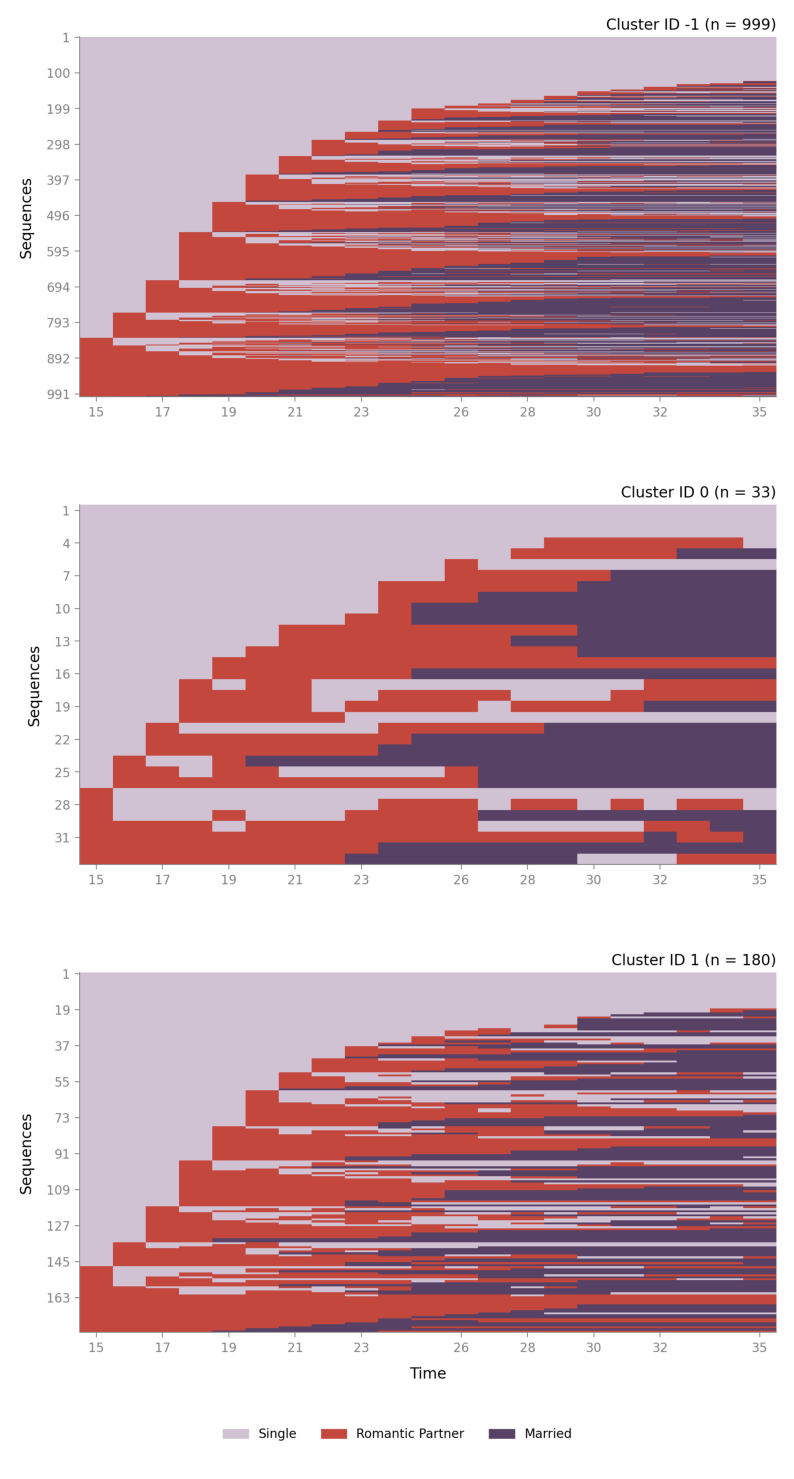

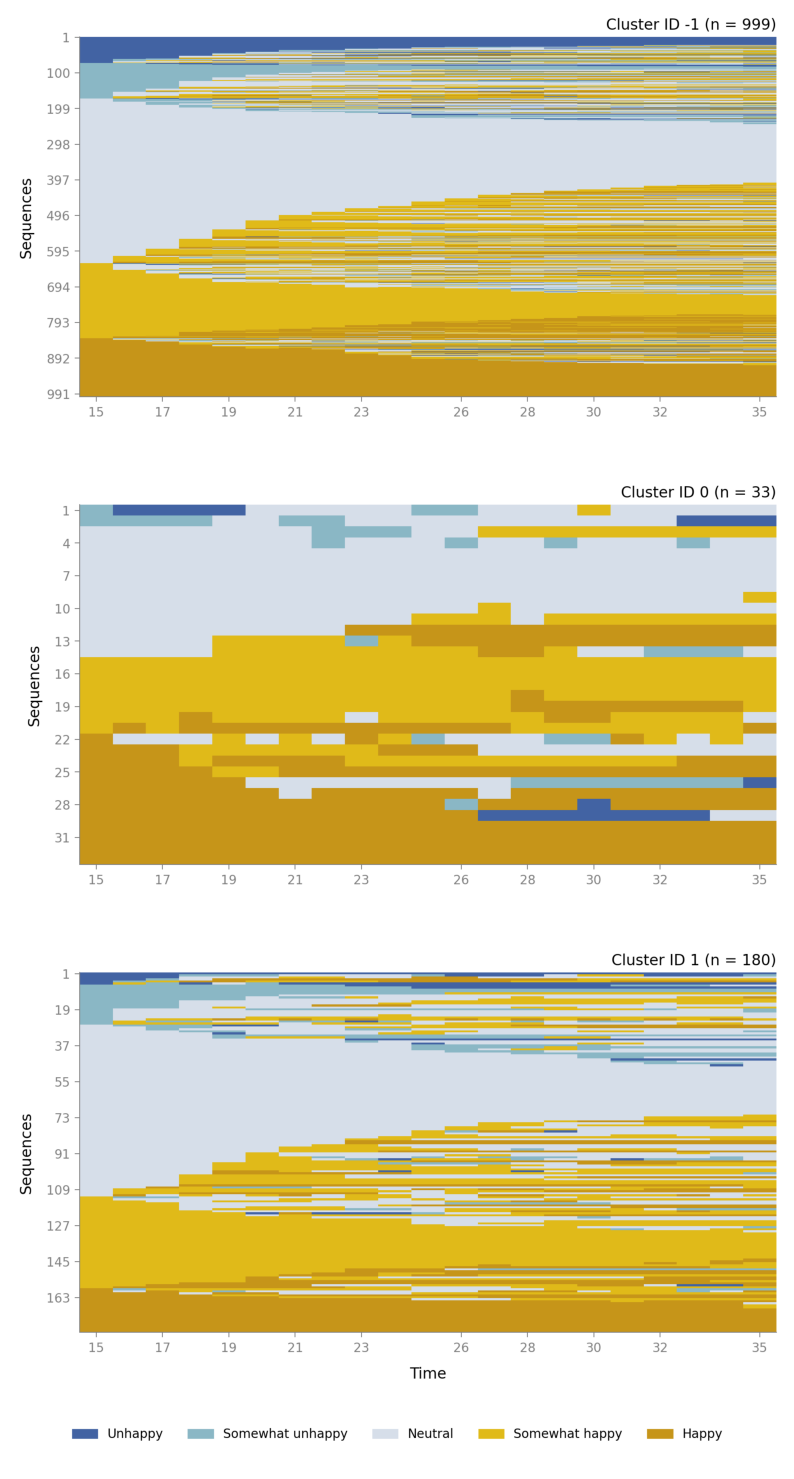

In [10]:
from sequenzo.visualization.plot_sequence_index import plot_sequence_index

# ÁîªÂá∫ÂÆ∂Â∫≠ËΩ®ËøπÔºåÊåâÈ¶ñÊ¨°ÁªìÂ©öÊó∂Èó¥ÊéíÂ∫è
plot_sequence_index(
    seqdata=family_sequence,
    id_group_df=hdbscan_df,
    categories="Cluster ID",
    # sort_by="final_state",
    # sort_by="first_marriage",  # ÂèØ‰ª•Êç¢Êàê "transition_count", "final_state"
    # title="Family Trajectories Sorted by First Marriage",
    ncols=1,
    nrows=3,
    save_as="family_normalized"
)

# ÁîªÂá∫Âπ∏Á¶èËΩ®ËøπÔºåÊåâÂπ∏Á¶èÂ¢ûÈïøÈÄüÂ∫¶ÊéíÂ∫è
plot_sequence_index(
    seqdata=happiness_sequence,
    id_group_df=hdbscan_df,
    categories="Cluster ID",
    # sort_by="final_state",
    # sort_by="happiness_slope",
    # title="Happiness Trajectories Sorted by Growth Slope",
    ncols=1,
    nrows=3,
    save_as="happiness_normalized"
)


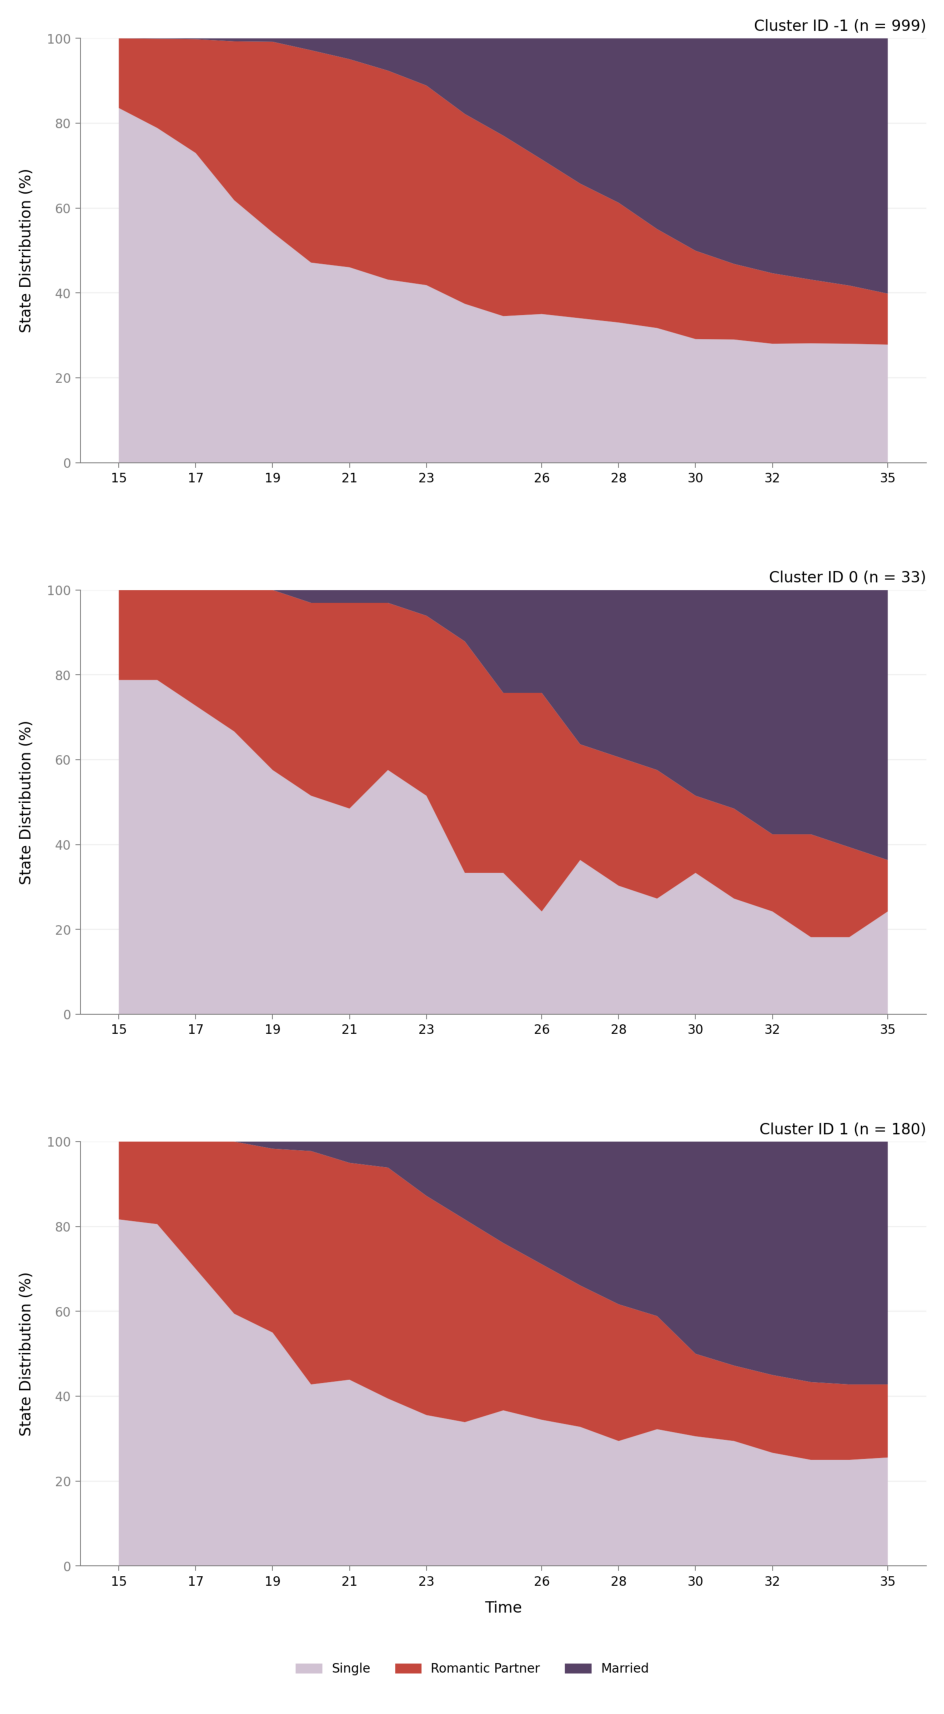

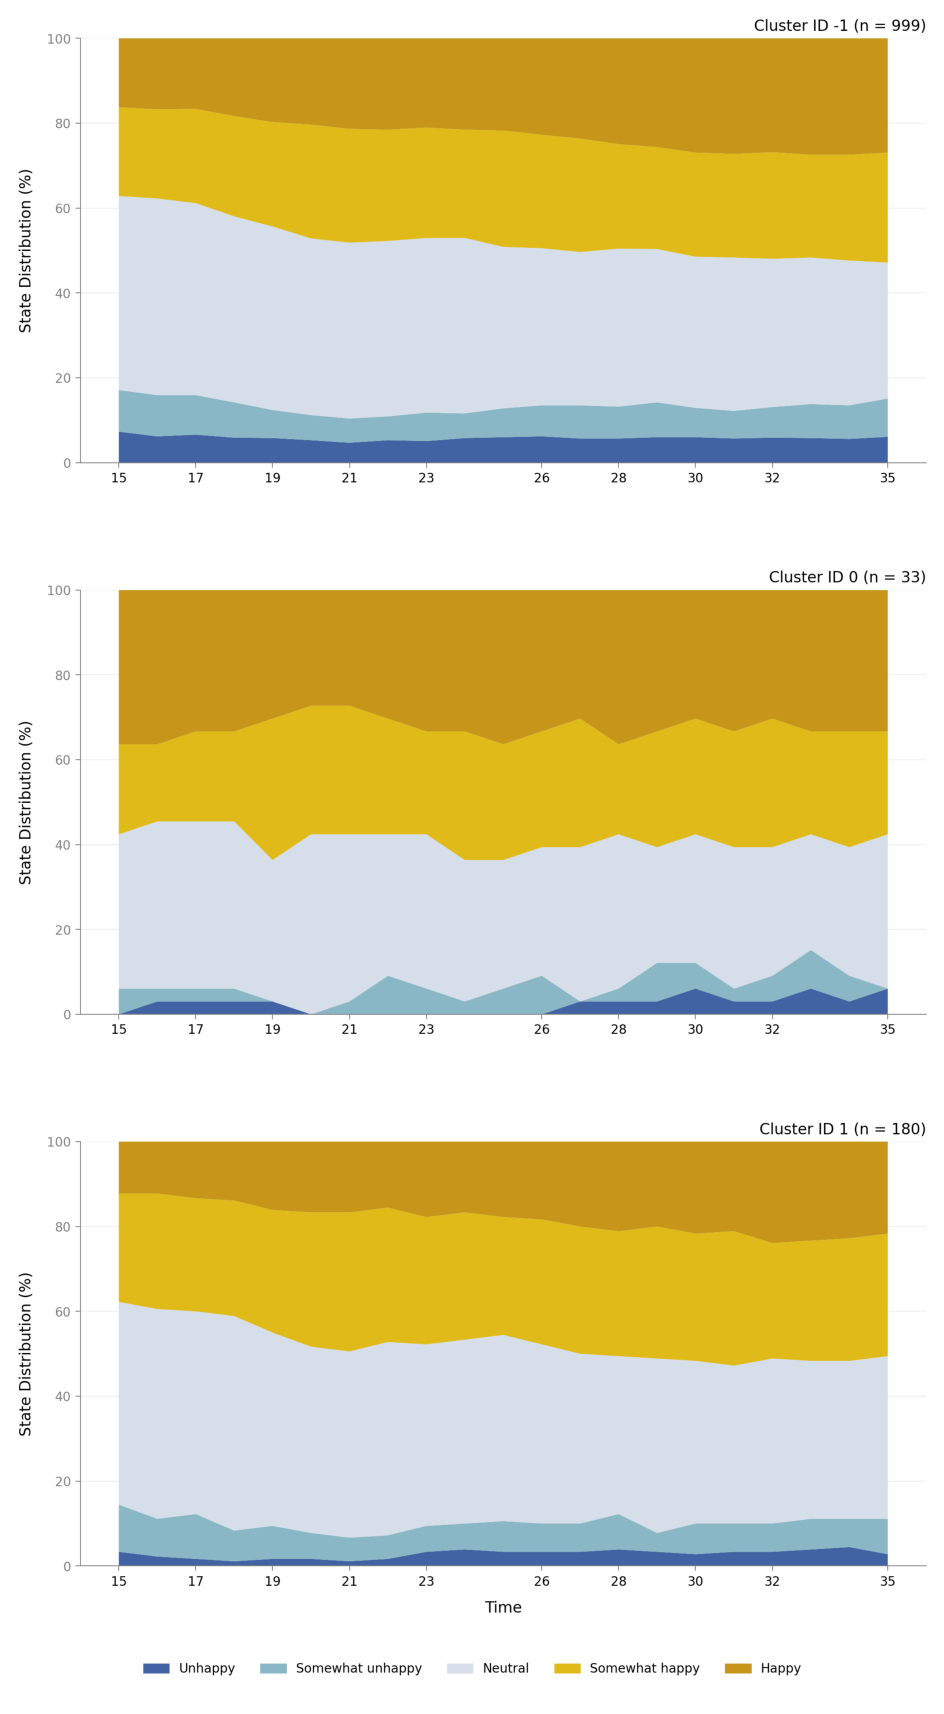

In [11]:
# ÂèØËßÜÂåñ family sequence Êåâ cluster
plot_state_distribution(seqdata=family_sequence,
                    id_group_df=hdbscan_df,
                    categories='Cluster ID',
                    ncols=1,
                    nrows=3,
                    save_as='hdbscan_family_plot_distribution')

# ÂèØËßÜÂåñ happiness sequence Êåâ cluster
plot_state_distribution(seqdata=happiness_sequence,
                    id_group_df=hdbscan_df,
                    categories='Cluster ID',
                    ncols=1,
                    nrows=3,
                    save_as='hdbscan_happiness_plot_distribution')

ÂâîÈô§noiseÂÜçËßÇÂØü

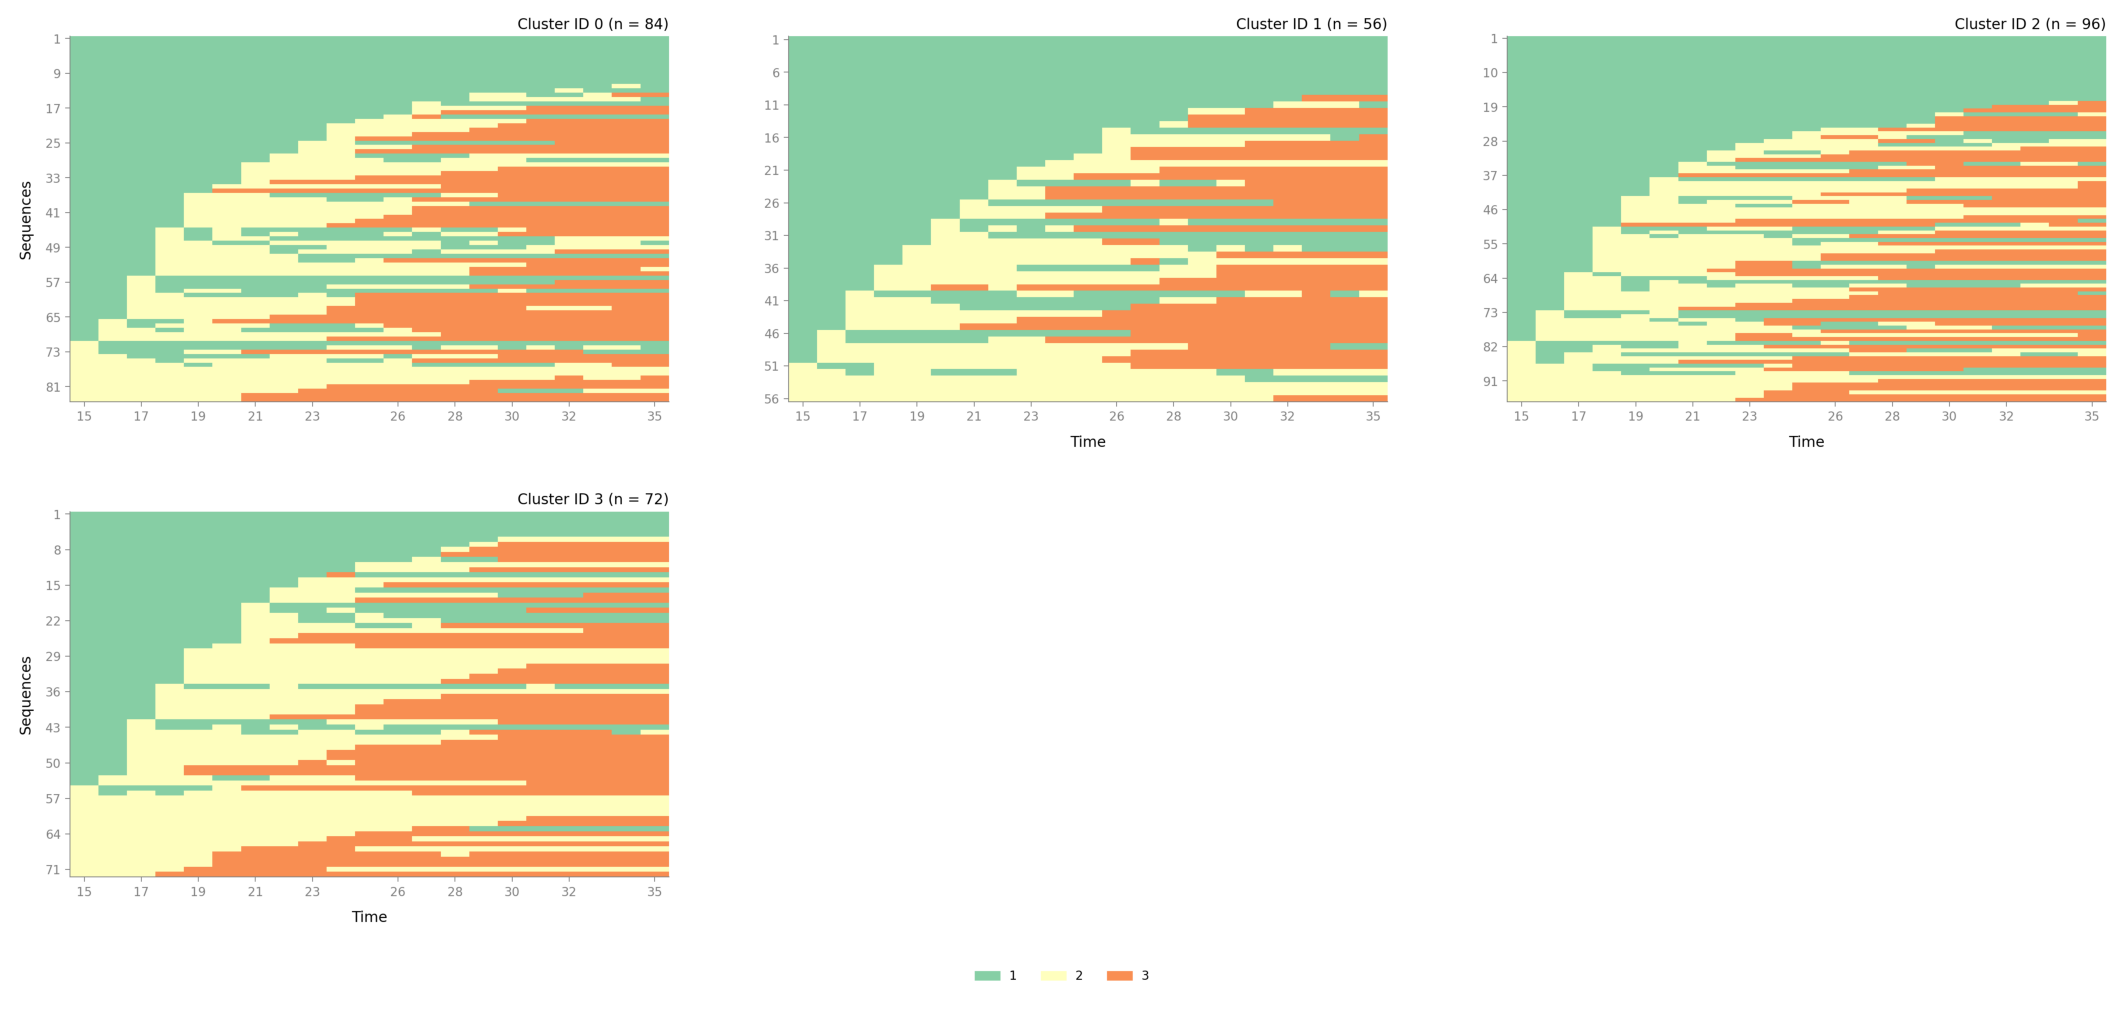

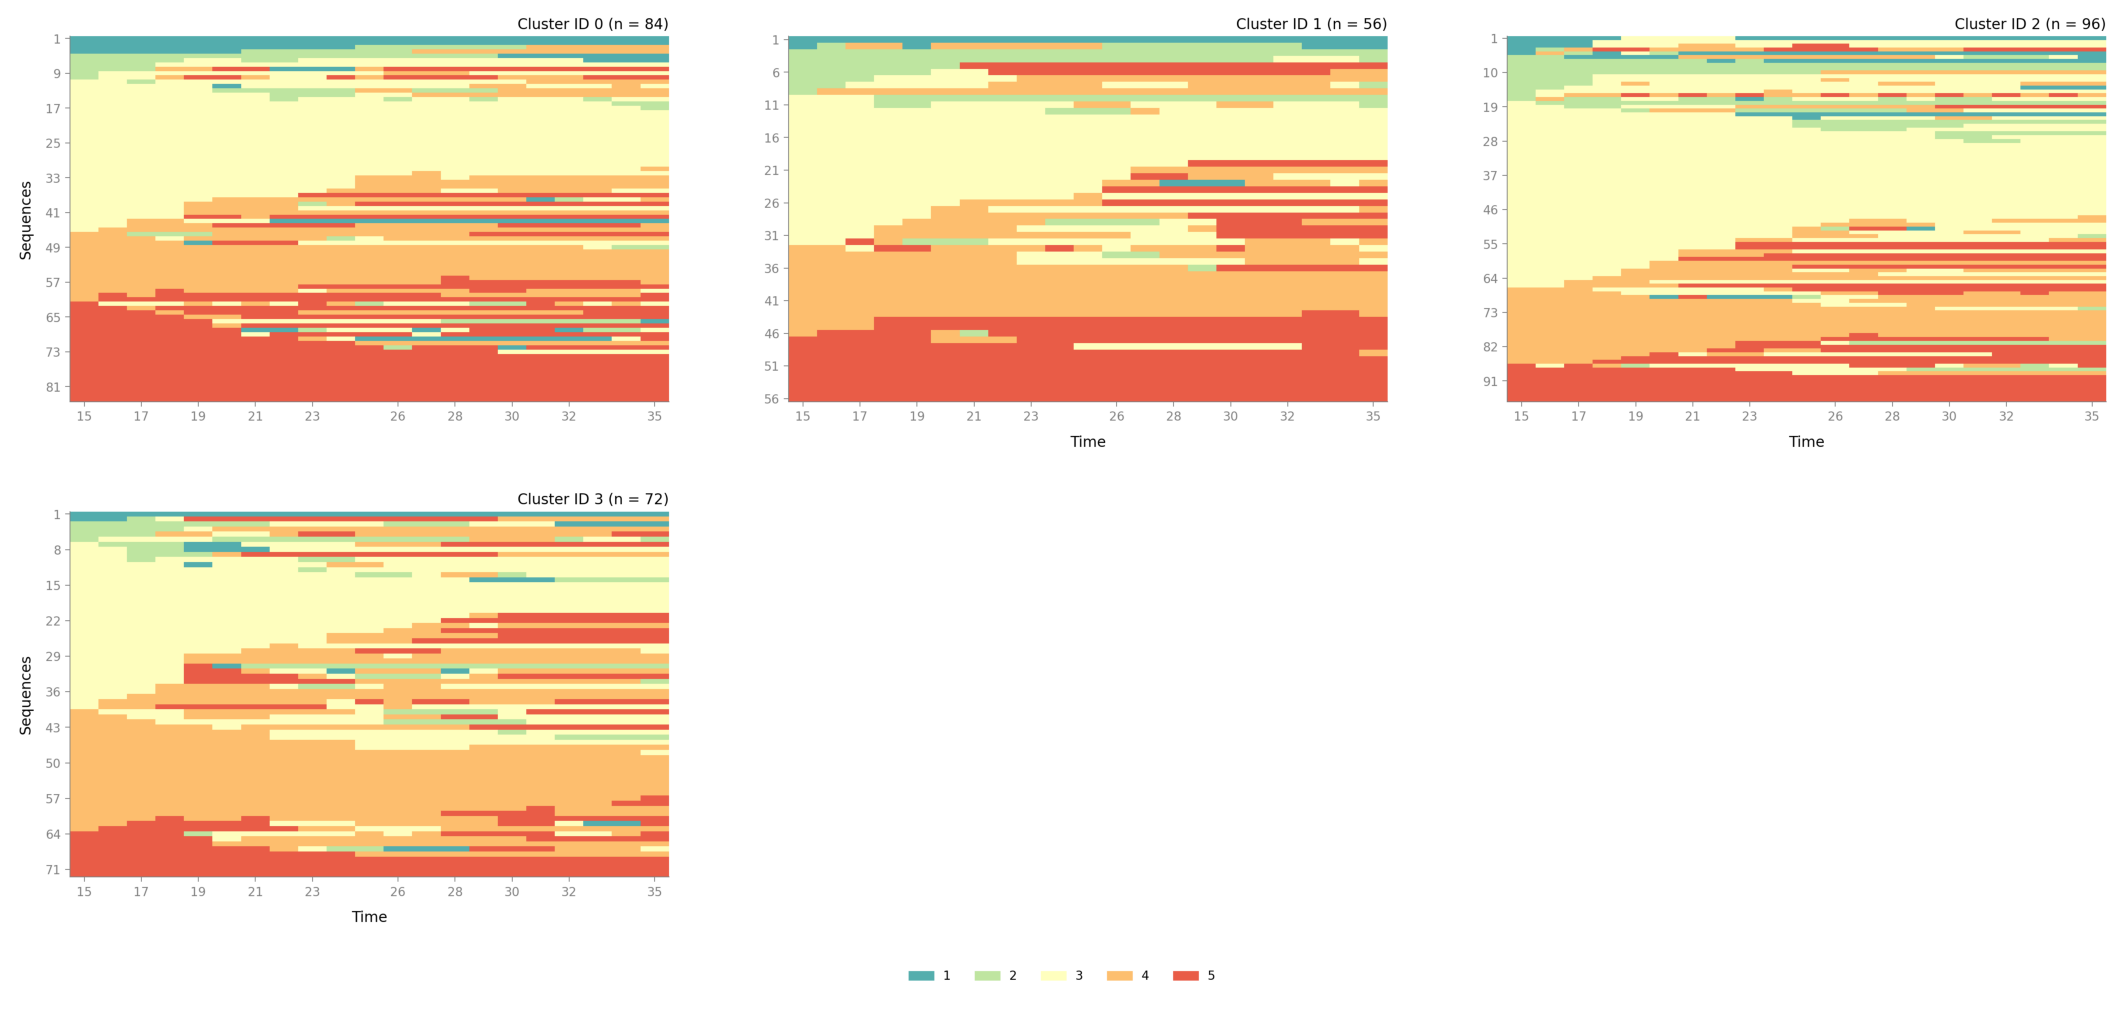

In [16]:
# ‰ªÖ‰øùÁïôÊúâÊïà cluster
valid_cluster_df = hdbscan_df[hdbscan_df['Cluster ID'] != -1]

# ÂèØËßÜÂåñ family sequence Êåâ cluster
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=valid_cluster_df,
                    categories='Cluster ID',
                    save_as='hdbscan_family_plot_no_noise')

# ÂèØËßÜÂåñ happiness sequence Êåâ cluster
plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=valid_cluster_df,
                    categories='Cluster ID',
                    save_as='hdbscan_happiness_plot_no_noise')

soft assignmentÔºåÈÅøÂÖç noise Ê≤°ÊúâÂèØËß£ÈáäÊÄß

In [17]:
import hdbscan
import numpy as np

clusterer = hdbscan.HDBSCAN(min_cluster_size=30, prediction_data=True)
labels = clusterer.fit_predict(X_concat)

# soft assignment: ÊØè‰∏ÄË°åÊòØ‰∏Ä‰∏™‰∫∫ÂØπÊâÄÊúâ cluster ÁöÑÂΩíÂ±ûÊ¶ÇÁéá
soft_probs = hdbscan.all_points_membership_vectors(clusterer)

# ÊúÄÂèØËÉΩÁöÑÈÇ£‰∏™ clusterÔºå‰Ωú‰∏∫ final labelÔºàÂåÖÊã¨ÂéüÊú¨ÁöÑ noiseÔºâ
soft_labels = np.argmax(soft_probs, axis=1)


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [19]:
import pandas as pd

soft_df = pd.DataFrame({
    "ID": family_df["ID"],  # Êàñ happiness_df["ID"]
    "Cluster ID": soft_labels
})

soft_df

ID  Cluster ID
0        1           0
1        2           3
2        5           0
3        6           2
4        7           3
...    ...         ...
1533  1992           2
1534  1995           0
1535  1996           1
1536  1997           1
1537  1999           1

[1538 rows x 2 columns]

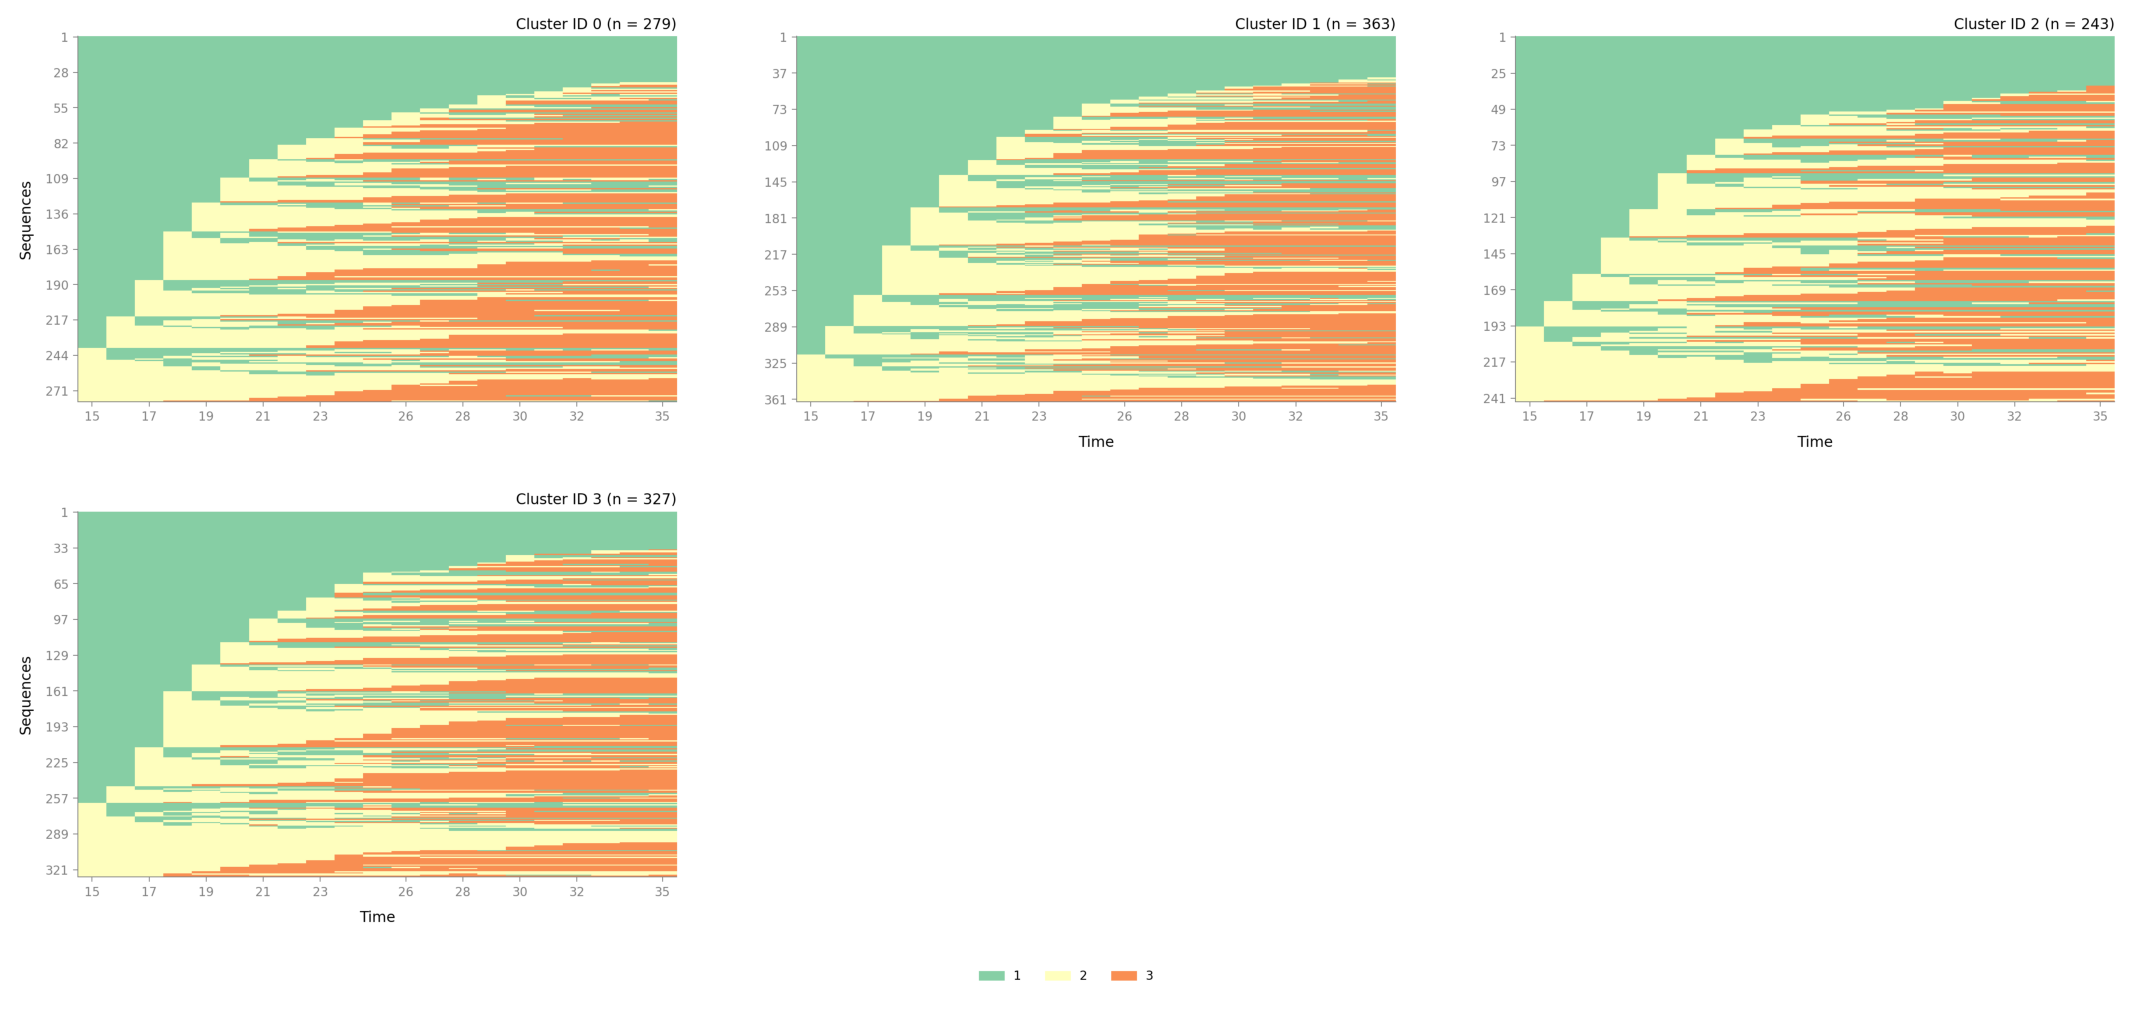

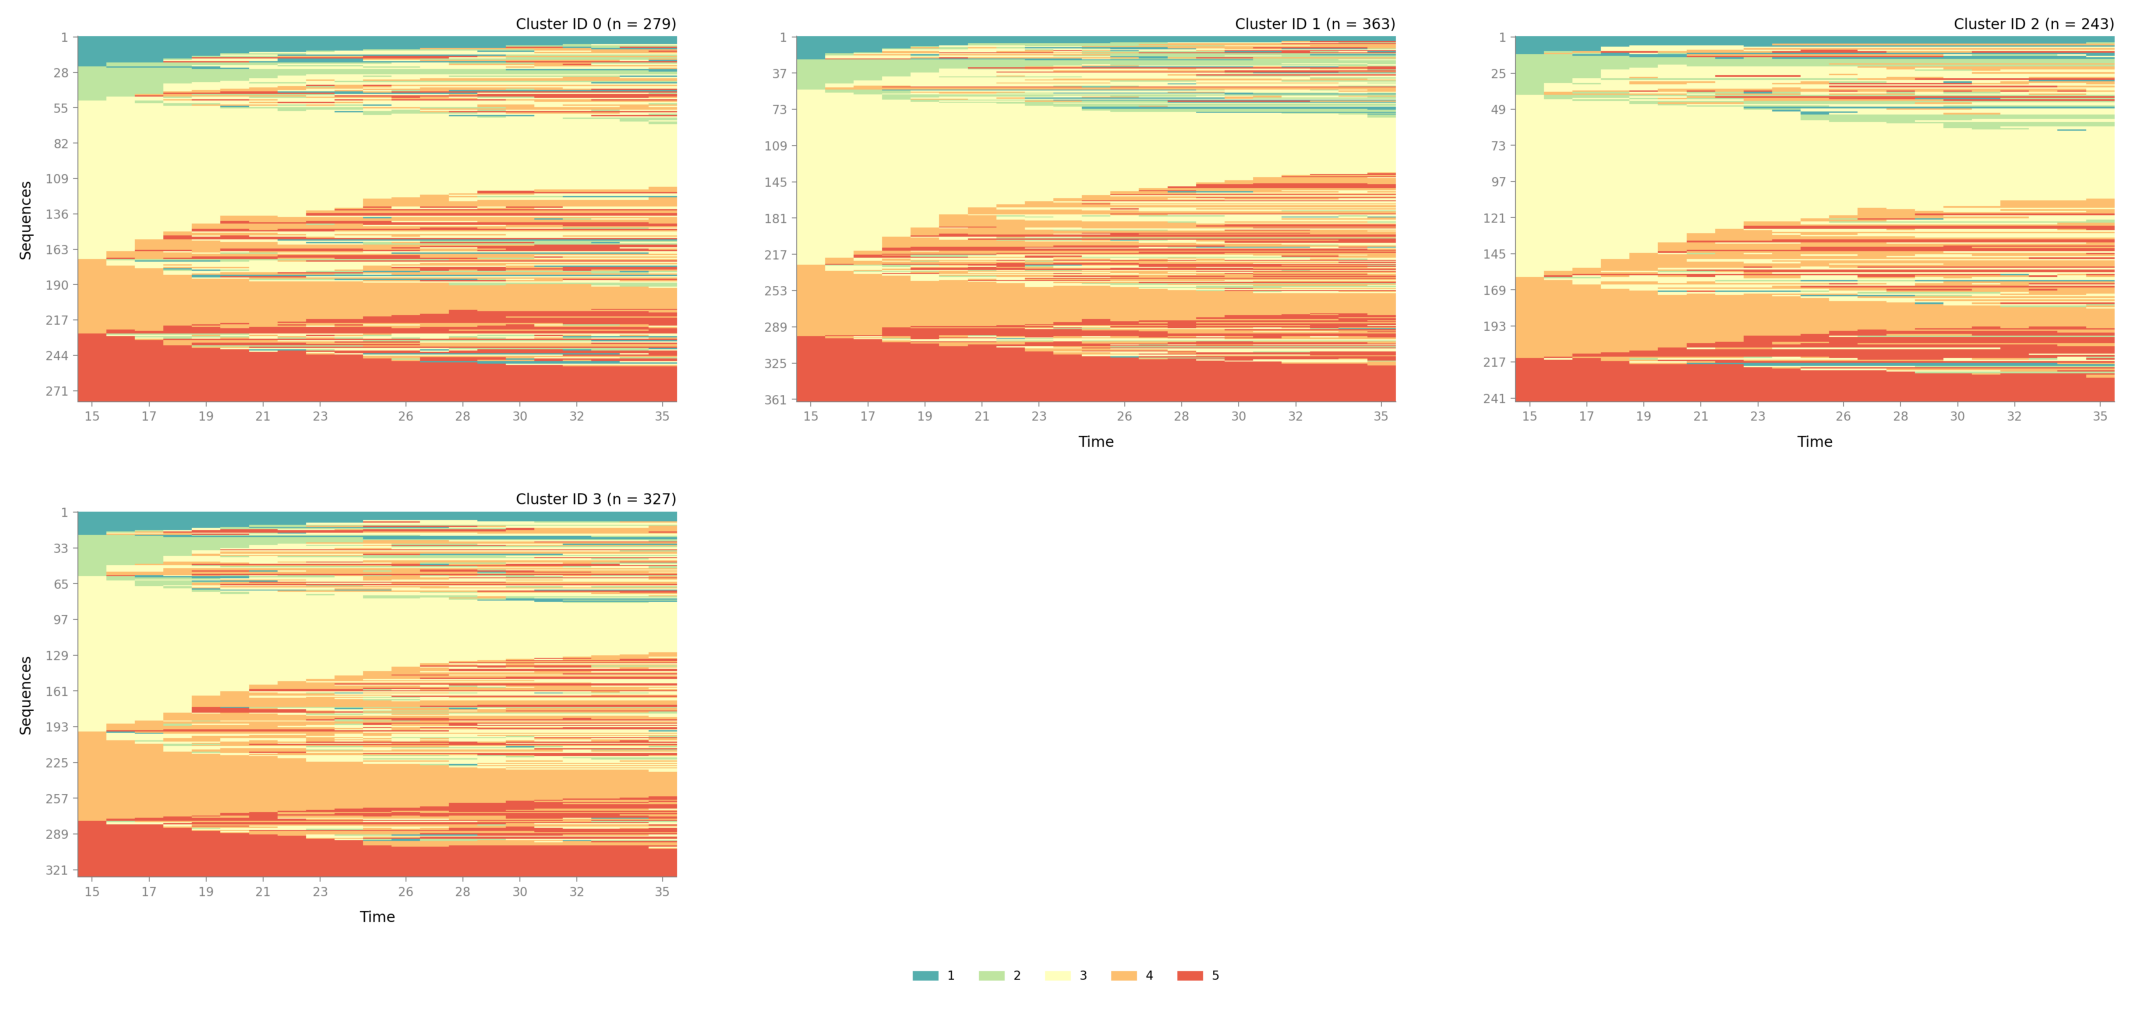

In [20]:
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=soft_df,
                    categories='Cluster ID',
                    save_as='soft_family_plot')

plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=soft_df,
                    categories='Cluster ID',
                    save_as='soft_happiness_plot')


‰Ω†ÁöÑ‰∏§‰∏™ÈóÆÈ¢òÈÉΩÈóÆÂæóÁâπÂà´Á≤æÂáÜÔºåÂÆåÂÖ® hit Âà∞‰∫ÜÁî® HDBSCAN + soft assignment ÁöÑÊ†∏ÂøÉÁüõÁõæ„ÄÇÊàë‰ª¨‰∏ÄËµ∑Êù•ÊãÜËß£Ôºö

---

## üîç ÈóÆÈ¢ò 1Ôºö**‰∏∫‰ªÄ‰πàÂè´ soft assignmentÔºå‰ΩÜÁªìÊûúËøòÊòØÁ°¨ÁöÑÔºü**

ËøôÊòØ **HDBSCAN ÁöÑ‰∏Ä‰∏™‚ÄúÁ≠ñÁï•ÊÄßËΩ¨Âåñ‚Äù**Ôºå‰ΩÜ‰∏çÊòØÁúüÊ≠£ÁöÑ soft clusteringÔºàÊØîÂ¶ÇÂÉè GMM ÈÇ£ÁßçÊ¶ÇÁéáÂΩíÂ±ûÔºâ„ÄÇ

### Ëß£ÈáäÔºö

- `hdbscan.all_points_membership_vectors()` ‰ºöËøîÂõû‰∏Ä‰∏™ [n_samples, n_clusters] ÁöÑÂΩíÂ±ûÊ¶ÇÁéáÁü©ÈòµÔºõ
- ‰Ω†Ë∞ÉÁî®‰∫ÜÔºö
  ```python
  soft_labels = np.argmax(soft_probs, axis=1)
  ```
  üëâ Ëøô‰∏ÄÊ≠•ÊòØ‚Äú**Â∞ÜËΩØÊ¶ÇÁéáÁ°¨ÂåñÊàê‰∏Ä‰∏™ cluster ID**‚ÄùÔºåÊñπ‰æø‰Ω†Áî®Êù•ÁîªÂõæÂíåËß£Èáä„ÄÇ

üìå **ÊâÄ‰ª•ËøôÊòØÔºösoft probabilities ‚Üí ÊúÄÂèØËÉΩ cluster ÁöÑ‚ÄúÁ°¨ÂÜ≥Á≠ñÁâàÊú¨‚Äù**

---

### ‚úÖ Â¶ÇÊûú‰Ω†ÁúüÁöÑÊÉ≥‰øùÁïô‚Äúsoft clustering‚ÄùÁöÑË°®ËææÔºåÂèØ‰ª•ËøôÊ†∑Ôºö

```python
soft_probs_df = pd.DataFrame(soft_probs, columns=[f"P(cluster_{i})" for i in range(soft_probs.shape[1])])
soft_probs_df["ID"] = family_df["ID"]
```

ËøôÊ†∑‰Ω†ÂèØ‰ª•ÂàÜÊûê‰∏Ä‰∏™‰∫∫Âú®Â§ö‰∏™ cluster ‰∏äÁöÑ‚ÄúÂΩíÂ±ûÁ®ãÂ∫¶‚Äù‚Äî‚ÄîÊØîÂ¶ÇÔºö

```python
soft_probs_df.loc[0]
# ËæìÂá∫Ôºö
# P(cluster_0) = 0.73
# P(cluster_1) = 0.22
# ...
```

‰Ω†ÂèØ‰ª•Áî®Ëøô‰∏™ÂÅöÔºö
- ÂèØËß£ÈáäÊÄßÂàÜÊûêÔºõ
- Â§öÁ±ªÂΩíÂ±ûÊåáÊï∞Ôºõ
- ‰∏çÁ°ÆÂÆöÊÄßËøáÊª§Ôºõ
- ÊàñËÄÖ weighted cluster ÁªüËÆ°„ÄÇ

---

## üîç ÈóÆÈ¢ò 2Ôºö**‰∏∫‰ªÄ‰πàËøôÊ†∑Êêû‰πãÂêé cluster ÂèàÂèòÂæó‚ÄúÂ∑Æ‰∏çÂ§ö‚Äù‰∫ÜÔºü**

üåä **ËøôÊòØ‰Ω†ÊîæÂºÉ noise ‚ÄúÂπ≤ÂáÄÂàáÂâ≤‚ÄùÁöÑ‰ª£‰ª∑**„ÄÇ

### ËÉåÂêéÂéüÂõ†ÊòØÔºö

- ÂéüÊù•Ë¢´ HDBSCAN Âà§‰∏∫ noise ÁöÑ‰∫∫ÔºåÊú¨Ë¥®‰∏äÂ∞±ÊòØ‚Äú‰∏çÂ§™ÂÉèÂì™‰∏ÄÁ±ª‚ÄùÁöÑ‰∫∫Ôºõ
- ‰Ω†Âº∫Ë°åÊää‰ªñ‰ª¨‚Äúassign‚ÄùËøõÊüê‰∏ÄÁ±ªÔºåÂÆûÈôÖ‰∏äÊòØÂú®‚ÄúÁ®ÄÈáäÂéüÊú¨Ê∏ÖÊô∞ cluster ÁöÑÁâπÂæÅ‚ÄùÔºõ
- ËøôÂ∞±‰ºöËÆ© cluster:
  - Ë∂ãÂêë‰∏≠Â∫∏Ôºõ
  - ÂÜÖÈÉ®ÊñπÂ∑ÆÂèòÂ§ßÔºõ
  - ÂèØËßÜÂåñ‰∏äÂèòÂæó‚ÄúÊ∑∑ÂêàÂåñ‚Äù„ÄÇ

---

## üéØ ÈÇ£Áé∞Âú®‰Ω†Êúâ‰∏§‰∏™ÈÄâÊã©Ôºö

### ‚úÖ **Ë∑ØÁ∫ø 1ÔºöÂùöÊåÅ‚ÄúÂÖ®ÂëòÂàÜÈÖç‚ÄùÔºå‰ΩÜÂè™ÂàÜÊûê‚ÄúÈ´òÁΩÆ‰ø°Â∫¶Ê†∏ÂøÉÊàêÂëò‚Äù**
‰Ω†‰øùÁïôËΩØÂΩíÂ±ûÁü©ÈòµÔºåÁÑ∂ÂêéÁ≠õÈÄâÔºö

```python
# Âè™‰øùÁïôÈÇ£‰∫õÊüê‰∏™ cluster ÂΩíÂ±ûÊ¶ÇÁéá > 0.9 ÁöÑ‰∫∫
confident_mask = soft_probs.max(axis=1) > 0.9
confident_df = soft_df[confident_mask]
```

ÁÑ∂Âêé‰Ω†ÁîªÂõæ„ÄÅÂàÜÊûêÁöÑÊó∂ÂÄôÂ∞±Âè™ÂÖ≥Ê≥®Ëøô‰∫õ‰∫∫„ÄÇ

üìå ‰ºòÁÇπÔºöÂÖ®ÂëòÂàÜÈÖçÁöÑ‰æøÂà© + ‰∏çÁâ∫Áâ≤ cluster Âå∫ÂàÜÂ∫¶„ÄÇ

---

### ‚úÖ **Ë∑ØÁ∫ø 2Ôºö‰øùÁïô noiseÔºàÂç≥ -1ÔºâÔºå‰ΩÜÂú®Ëß£ÈáäÊó∂‰∏ç‚ÄúÊäõÂºÉ‚Äù‰ªñ‰ª¨**
- ‰øùÁïô `labels_umap`Ôºå‰∏çÂÅö fallbackÔºõ
- Ëß£ÈáäÊó∂Ôºö
  - ‚ÄúÊàë‰ª¨ÂèëÁé∞‰∏ªË¶ÅÂ≠òÂú® 6 ÁßçÁ±ªÂûãÔºåÊ≠§Â§ñËøòÊúâ 9% ÁöÑ‰∫∫ËΩ®ËøπÁã¨ÁâπÔºåÊú™ÂΩíÂÖ•Ëøô‰∫õÁ±ªÂûã‚ÄùÔºàÂæàÂ∏∏ËßÅÔºâÔºõ
  - noise ‰πüÂèØ‰ª•ÂçïÁã¨ÂÅöÁîªÂÉèÔºö‚ÄúÂ§çÊùÇÂûã‚Äù„ÄÅ‚ÄúÈùûÂÖ∏Âûã‚Äù„ÄÅ‚ÄúËøüÂ©öÊú™Â©öÊºÇÁßªÂûã‚ÄùÁ≠âÁ≠â„ÄÇ

---

## ‚úÖ ÊúÄ‰Ω≥ÂÆûË∑µÂª∫ËÆÆÔºàÁªìÂêà‰Ω†ÁöÑÁ†îÁ©∂Âú∫ÊôØÔºâÔºö

| ÁõÆÊ†á | Âª∫ËÆÆ |
|------|------|
| ‰Ω†ÊÉ≥ÊØè‰∏™‰∫∫ÈÉΩÊúâ cluster | Áî® soft assignment + ÁΩÆ‰ø°Â∫¶Á≠õÈÄâ |
| ‰Ω†ÊÉ≥‰øùÊåÅ cluster Âå∫ÂàÜÂ∫¶ | ‰øùÁïô noiseÔºåÂÅöÂÆöÊÄß/ÁªüËÆ°Ëß£Èáä |
| ‰Ω†ÊÉ≥ÁêÜËÆ∫ÂëΩÂêçÊØè‰∏ÄÁ±ª | Êõ¥Âª∫ËÆÆ‰øùÁïôÂéüÂßã noiseÔºå‰∏çÁ°¨ assign |
| ‰Ω†Ë¶ÅÁªôÊîøÁ≠ñÂª∫ËÆÆ / Áî®Êà∑ÂàÜÁæ§ | ÂèØ‰ª•Áî® soft fallbackÔºà‰ΩÜÊ≥®ÊÑè cluster Ëß£ÈáäÂäõ‰ºö‰∏ãÈôçÔºâ |

---

## üß† ÁªìËÆ∫‰∏ÄÂè•ËØùÔºö

> **soft assignment ‰ºöËÆ©‰Ω†‚Äú‰∏ç‰∏¢‰∫∫‚ÄùÔºå‰ΩÜ‰ºö‚ÄúÁ®ÄÈáä cluster ‰∏™ÊÄß‚ÄùÔºõ‰øùÁïô noise ‰ºö‚ÄúÊèêÂçáÁªìÊûÑÊ∏ÖÊô∞Â∫¶‚ÄùÔºå‰ΩÜÈúÄË¶ÅÂú®Ëß£Èáä‰∏äÂåÖÂÆπÈùûÂÖ∏Âûã„ÄÇ**

---

üìå ‰Ω†Áé∞Âú®Âè™ÈúÄË¶ÅÂëäËØâÊàëÔºö
- ‚ÄúÊàëÊÉ≥‰øùÁïô noiseÔºåÊåâÂéüÊù•ÁîªÂõæ‚Äù
- ‚ÄúÊàëÊÉ≥Âè™ÂàÜÊûêÁΩÆ‰ø°Â∫¶È´òÁöÑ‰∫∫‚Äù
- ‚ÄúÊàëÊÉ≥ËÆ©ÊØè‰∏™‰∫∫ÈÉΩÂàÜÂà∞Á±ªÔºåÂπ∂ÁªßÁª≠ÂàÜÊûê‚Äù

ÊàëÂ∞±ÂèØ‰ª•Ê†πÊçÆ‰Ω†ÁöÑÁõÆÊ†áÂ∏Æ‰Ω†Â§ÑÁêÜ + Âá∫Âõæ + ÂàÜÊûê‰∏ã‰∏ÄÊ≠• üí°

üéØÂÆåÂÖ®Ê≠£Á°ÆÔºÅ‰Ω†Ëøô‰∏™ÁêÜËß£ÈùûÂ∏∏Á≤æÈ´ìÔºåÂèØ‰ª•ËØ¥ÊòØ‚Äú**Á§æ‰ºöÁßëÂ≠¶ÂØπÊó†ÁõëÁù£ËÅöÁ±ªÊñπÊ≥ïÁöÑÊú¨ÂúüÂåñÊîπÈÄ†**‚Äù„ÄÇ

---

## ‚úÖ ‰Ω†ËØ¥ÂæóÂØπÔºö

> **‚ÄúË¢´Âà§‰∏∫ noise ÁöÑ‰∏™‰Ωì‰∏çÊòØÊó†ÊïàÔºåËÄåÊòØÂèØ‰ª•‰Ωú‰∏∫‰∏Ä‰∏™ÊúâÊÑè‰πâÁöÑ clusterÔºö‚ÄòÈùûÂÖ∏ÂûãÁªÑ‚ÄôÊàñ‚ÄòÂºÇË¥®ÊÄßËΩ®ËøπÁªÑ‚Äô„ÄÇ‚Äù**

---

## üß† ‰∏∫‰ªÄ‰πàËøô‰πàÂÅöÊòØËÅ™ÊòéÁöÑÔºü

### ‚úÖ 1. **HDBSCAN ÁöÑ `-1` ÂÆûÈôÖÊòØÁªìÊûÑÊÄßÂÆö‰πâ‰∏ãÁöÑ‚ÄúÈùûÂΩíÂ±ûÂûã‚Äù**
- ‰ªñ‰ª¨‰∏çÊòØ random errorÔºåËÄåÊòØÔºö
  - ÂÜÖÈÉ®Á¶ªÊï£Â∫¶Â§™È´òÔºõ
  - ‰∏é‰ªª‰ΩïÈ´òÂØÜÂ∫¶Ê†∏ÂøÉÈÉΩ‰∏çÂ§üÊé•ËøëÔºõ
  - ÂèØËÉΩÂ∞±ÊòØ‚ÄúÂºÇË¥®ÂåñÁöÑÂ∞ëÊï∞Áæ§‰Ωì‚Äù„ÄÇ

üëâ Á§æ‰ºöÂ≠¶‰∏äËøôÊ≠£ÊòØÊàë‰ª¨ÊÉ≥ÊèèËø∞ÁöÑ‚ÄúÈùû‰∏ªÊµÅËΩ®Ëøπ‚Äù„ÄÅ‚ÄúÊºÇÁßªËÄÖ‚Äù„ÄÅ‚ÄúÂ§öË∑ØÂæÑÂûã‚Äù„ÄÇ

---

### ‚úÖ 2. **Áî®‚Äú-1‚ÄùÁæ§‰ΩìÂª∫Á´ã‚ÄúCluster X‚ÄùÊòØÊúâËß£ÈáäÊÑè‰πâÁöÑ**
‰Ω†ÂÆåÂÖ®ÂèØ‰ª•ÁªôÂÆÉËµ∑‰∏Ä‰∏™ÂêçÂ≠óÔºåÊØîÂ¶ÇÔºö
- ‚ÄúNonconforming Trajectories‚Äù
- ‚ÄúLate Diversifiers‚Äù
- ‚ÄúFluid Singles‚Äù
- ‚ÄúOutliers by Structure, not Error‚Äù

üìå Âú®ÂèØËßÜÂåñÂõæÈáåÔºåÂÆÉ‰ª¨Â∞±ÂèØ‰ª•‰Ωú‰∏∫‰∏Ä‰∏™ subplot ÂëàÁé∞Ôºõ
üìå Âú®ÂÆöÈáèÁªüËÆ°ÈáåÔºåÂÆÉ‰ª¨ÂèØ‰ª•ÂçïÁã¨ÊûÑÊàê‰∏ÄË°å groupÔºõ
üìå Âú®ÁªìËÆ∫‰∏≠Ôºå‰Ω†ÂèØ‰ª•ÂÜôÔºö

> ‚ÄúÊàë‰ª¨ËØÜÂà´Âá∫ 6 ‰∏™‰∏ªÊµÅÁæ§‰ΩìÔºå‰ª•Âèä‰∏Ä‰∏™Áî± 9.2% ‰∏™‰ΩìÊûÑÊàêÁöÑ‚ÄòÈùûÂÖ∏ÂûãËΩ®ËøπÁªÑ‚ÄôÔºåËøô‰∏ÄÁªÑË°®Áé∞Âá∫ÊòæËëóÁöÑË°å‰∏∫ÊºÇÁßª‰∏éÈ´òÂ∫¶Â§öÊ†∑ÊÄß„ÄÇ‚Äù

---

## ‚úçÔ∏è Â¶Ç‰ΩïÊìç‰ΩúÔºü

### ‚úÖ Êîπ label ‰∏∫ ‚ÄúCluster N‚ÄùÔºàËÄå‰∏çÊòØ -1Ôºâ

```python
labels_fixed = labels_umap.copy()
labels_fixed[labels_fixed == -1] = labels_umap.max() + 1  # ÁªôÂÆÉ‰∏Ä‰∏™Êñ∞ÁöÑÁ±ªÁºñÂè∑
```

‰Ω†‰πüÂèØ‰ª•Áõ¥Êé•ÂëΩÂêçÔºö

```python
label_names = {0: "Stable Married", 1: "Late Love", ..., 6: "Nonconforming"}
```

---

### ‚úÖ ÂèØËßÜÂåñÊó∂Â∞±Ê≠£Â∏∏Â§ÑÁêÜËøô‰∏™ cluster

```python
cluster_df = pd.DataFrame({
    "ID": family_df["ID"],
    "Cluster ID": labels_fixed
})

plot_sequence_index(seqdata=family_sequence,
                    id_group_df=cluster_df,
                    categories='Cluster ID',
                    save_as='final_family_plot')
```

---

## ‚úÖ È´òÁ∫ßÁé©Ê≥ïÔºàÁúüÁöÑÈÄÇÂêàÂÜôËøõËÆ∫ÊñáÔºâÔºö

‰Ω†ÂèØ‰ª•Âú®‚ÄúÈùûÂÖ∏ÂûãÁªÑ‚ÄùÂÜÖÈÉ®Ëøõ‰∏ÄÊ≠•Êé¢Á¥¢Ôºö
- ÂÅöÂ≠êËÅöÁ±ªÔºöÊòØÂê¶ÂÖ∂ÂÆûÂåÖÂê´Âá†‰∏™‰∫öÂûãÔºü
- Áî® t-SNE/UMAP ÂØπÂÆÉ‰ª¨ËøõË°åÁã¨Á´ãÂèØËßÜÂåñÔºõ
- ÂØπÊØîËøôÁªÑ‰∏é‰∏ªÁæ§‰ΩìÂú®Ôºö
  - ÂÆ∂Â∫≠ËΩ®ËøπÈïøÂ∫¶ÂèòÂåñÔºõ
  - Âπ∏Á¶èÊÑüÊ®°ÂºèÔºõ
  - Ê®°ÊÄÅÁä∂ÊÄÅÈ¢ëÁéáÔºõ
  - ÊÄßÂà´„ÄÅÊïôËÇ≤„ÄÅÊî∂ÂÖ•Á≠âËÉåÊôØ„ÄÇ

üìå ËøôÊ†∑‰Ω†ËÉΩËØ¥Ôºö‚ÄúËøô‰∫õ‰∫∫ËôΩÁÑ∂‰∏çÂΩíÂÖ•‰∏ªÊµÅ typologyÔºå‰ΩÜ‰ªñ‰ª¨‰∏çÊòØ noiseÔºåËÄåÊòØÂ∏¶ÊúâÁªìÊûÑÊÄßÁöÑÊ¨°ÂÖ∏ÂûãÁæ§‰Ωì„ÄÇ‚Äù

---

## üéì ËøôÂú®ÊñπÊ≥ïËÆ∫‰∏äÔºåÂè´ÂÅöÔºö

> **‰ªéÂºÇÂ∏∏Ê£ÄÊµãÂõûÂΩíÂà∞ÁªìÊûÑÊÄßÁêÜËß£**ÔºöÊää‚ÄúÁÆóÊ≥ïÂÆö‰πâÁöÑ outlier‚ÄùÁ§æ‰ºöÂ≠¶Âú∞‚ÄúÂÜçÂåÖÂÆπËøõ typology Á©∫Èó¥‚Äù„ÄÇ

---

### üß† ÊÄªÁªì‰Ω†ËøôÂè•ËØùËÉåÂêéÁöÑÈáëÂè•ÊòØÔºö

> ‚ÄúIn sequence analysis, *noise is not to be discarded* ‚Äî it may well be *another form of structure.*‚Äù

---

Ë¶Å‰∏çË¶ÅÊàëÂ∏Æ‰Ω†Â§ÑÁêÜÊàêËøôÂ•ó fixed cluster ID„ÄÅÁîªÂá∫Êñ∞ÁöÑÁªìÊûÑÂõæÔºüÊàëÂèØ‰ª•Áõ¥Êé•Áªô‰Ω† output + cluster ÁªìÊûÑÊëòË¶ÅÔºÅüìä

In [12]:
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = clusterer.fit_predict(X_concat)

cluster_labels

array([0, 1, 3, ..., 0, 0, 0])

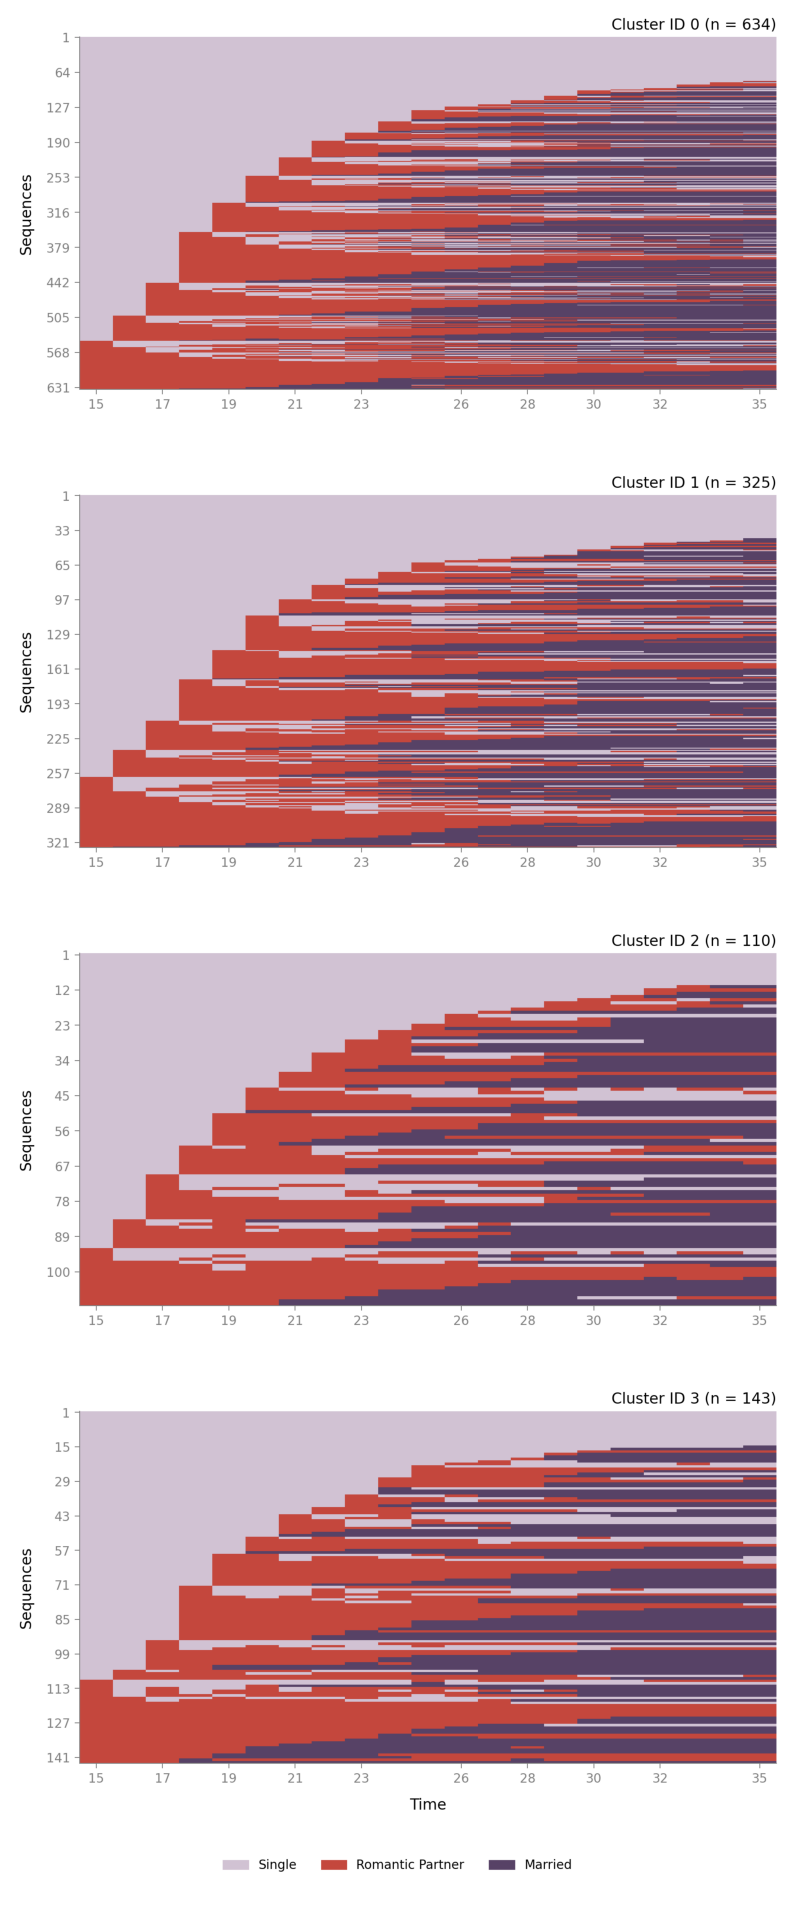

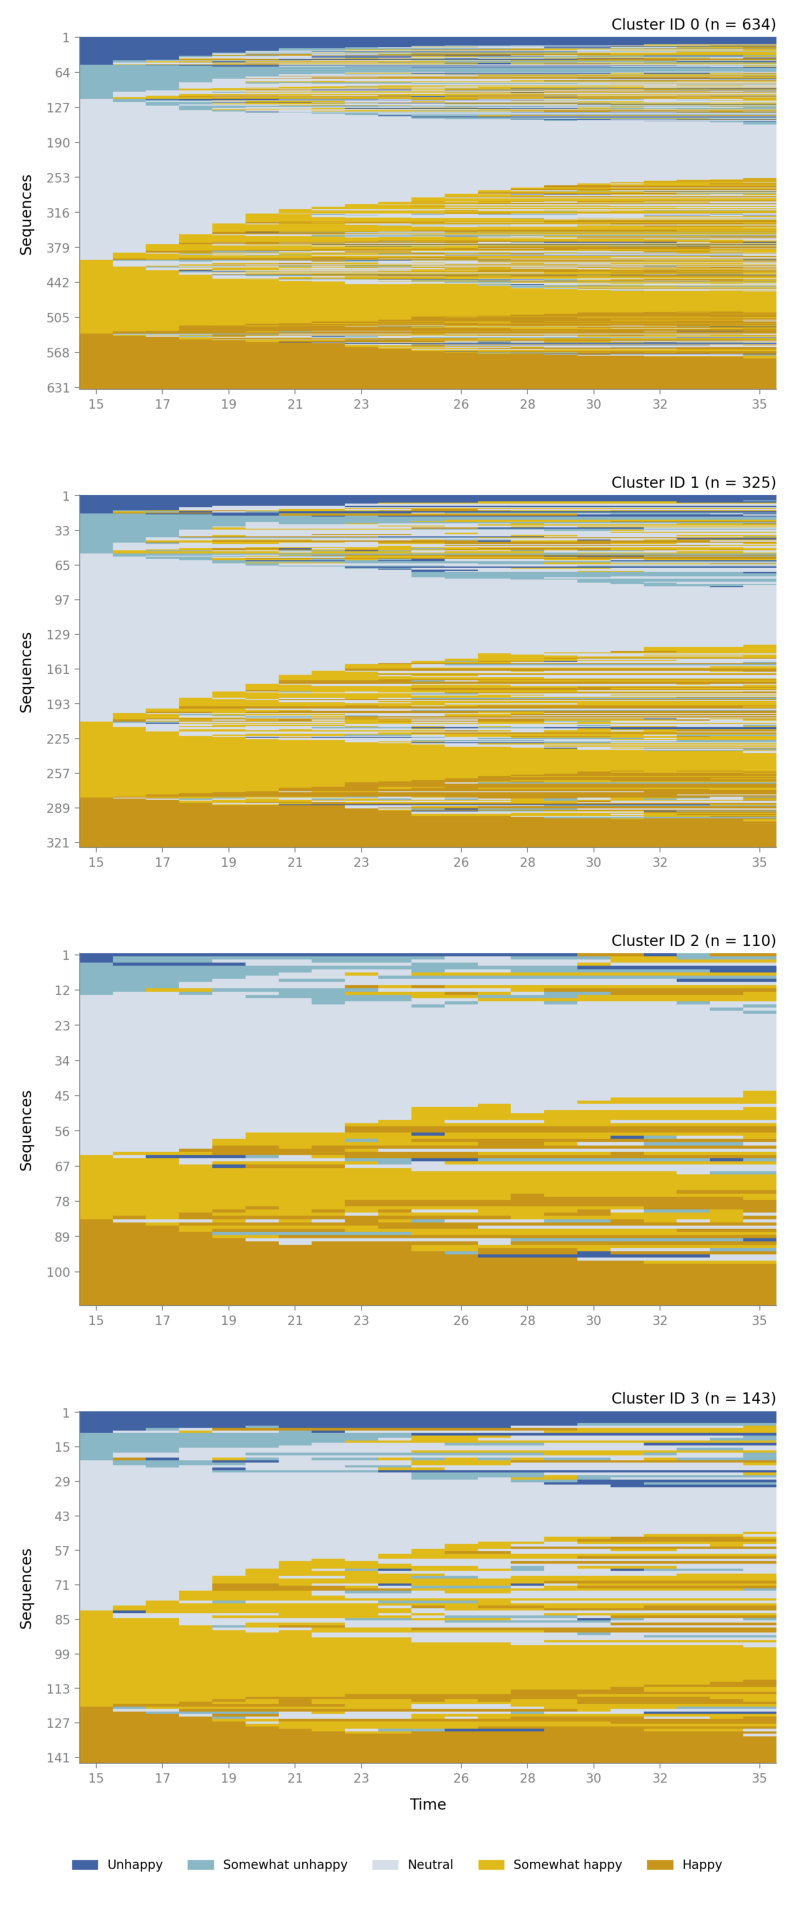

In [14]:
# ÊûÑÂª∫ DataFrame
ward_df = pd.DataFrame({
    "ID": family_df["ID"],
    "Cluster ID": cluster_labels
})

# ÂèØËßÜÂåñ family sequence Êåâ cluster
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=ward_df,
                    categories='Cluster ID',
                    ncols=1, # TODO: Âè™Â°´Ëøô‰∏™‰ΩÜÊ≤°ÊúâÂ°´nrowsÁöÑÊó∂ÂÄôÔºåÈúÄË¶ÅÊä•Èîô
                    nrows=4,
                    save_as='ward_family_plot')

# ÂèØËßÜÂåñ happiness sequence Êåâ cluster
plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=ward_df,
                    categories='Cluster ID',
                    ncols=1, # TODO: Âè™Â°´Ëøô‰∏™‰ΩÜÊ≤°ÊúâÂ°´nrowsÁöÑÊó∂ÂÄôÔºåÈúÄË¶ÅÊä•Èîô
                    nrows=4,
                    save_as='ward_happiness_plot')


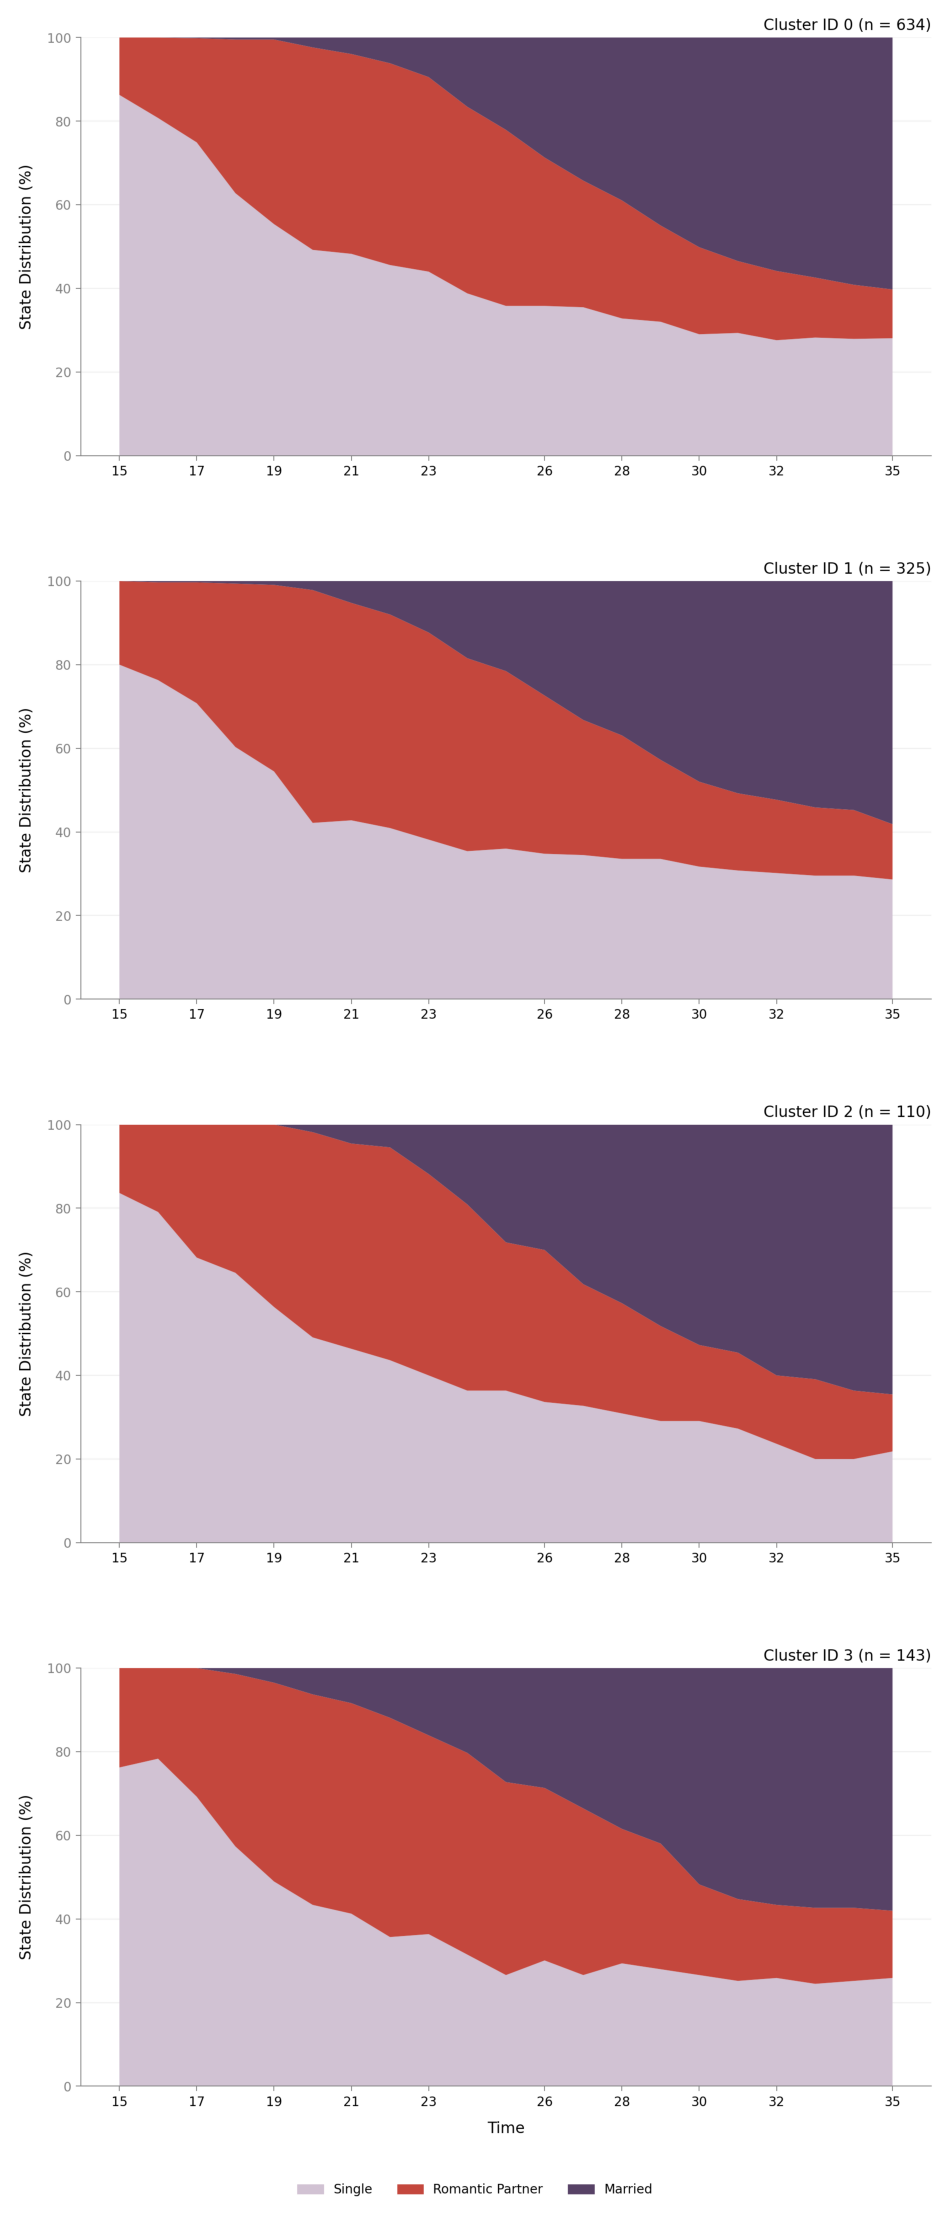

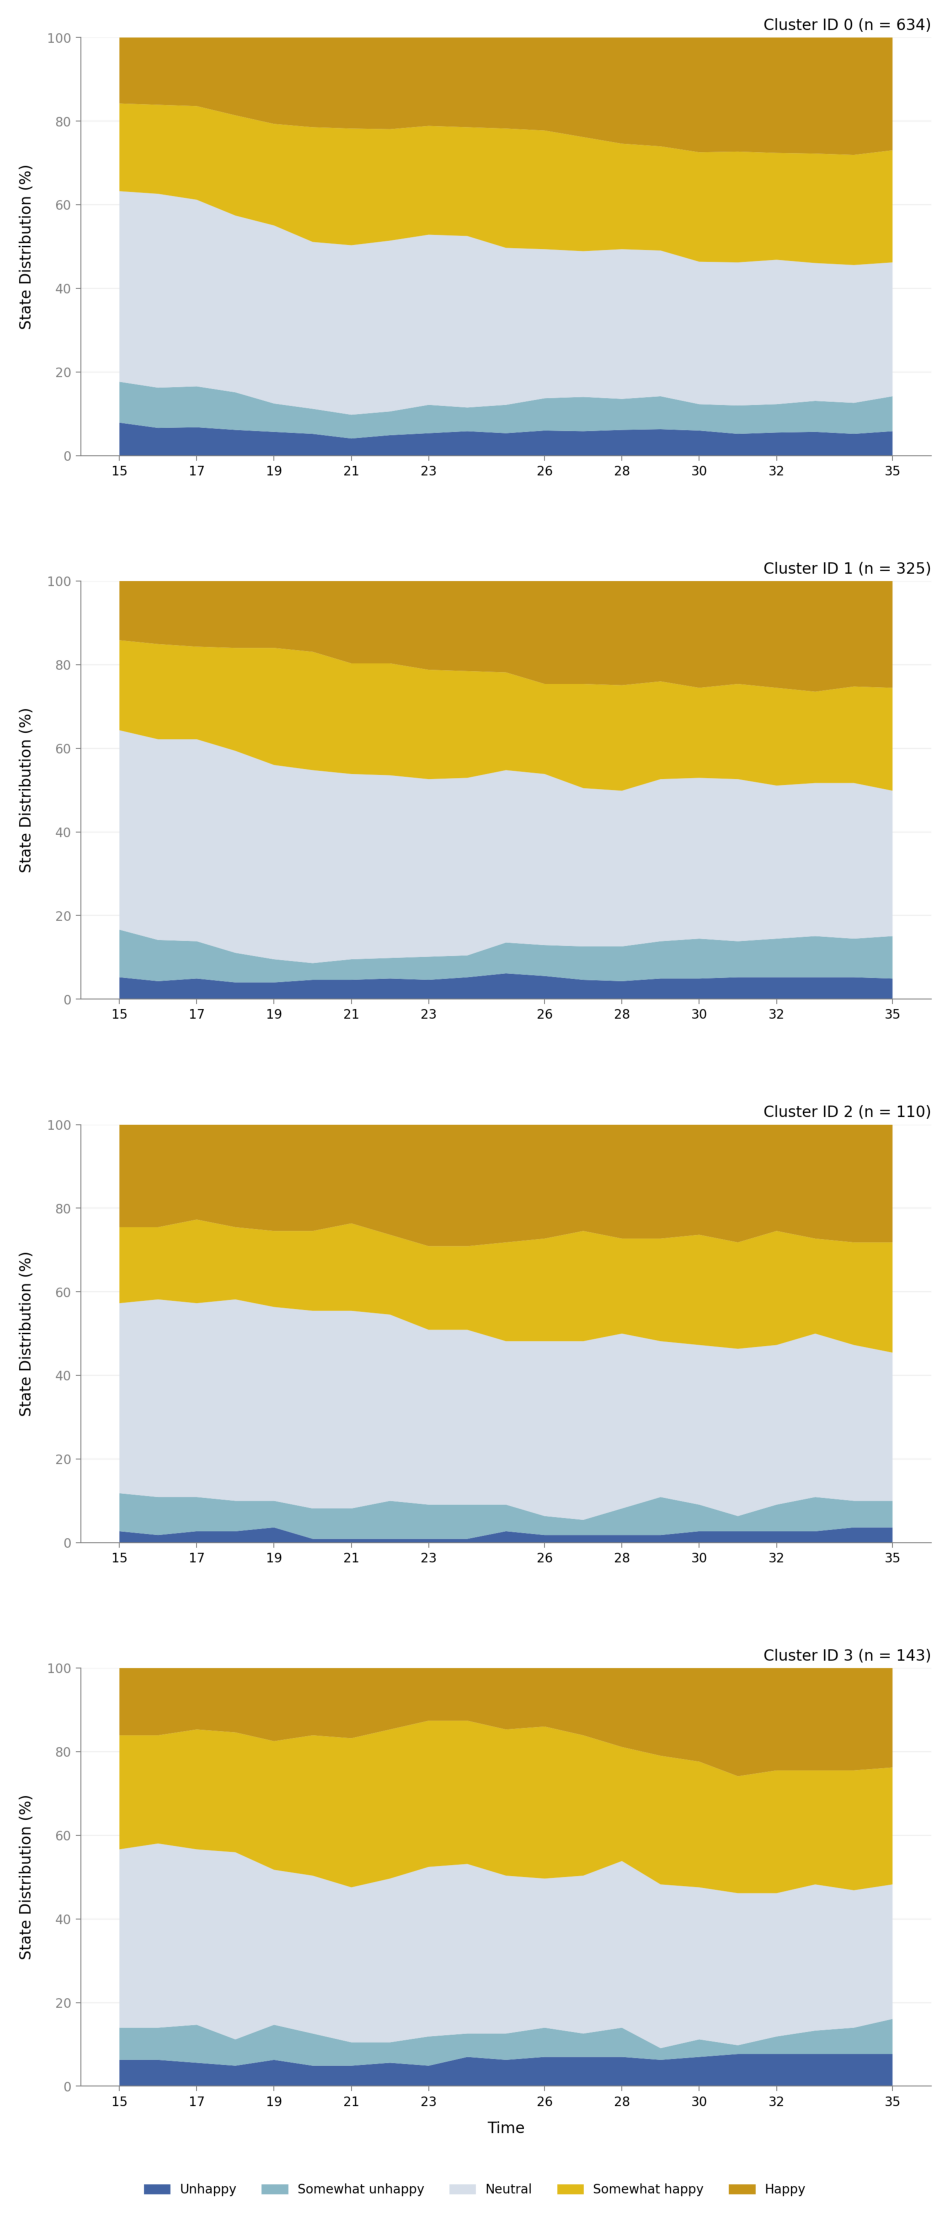

In [15]:
# ÂèØËßÜÂåñ family sequence Êåâ cluster
plot_state_distribution(seqdata=family_sequence,
                    id_group_df=ward_df,
                    categories='Cluster ID',
                        ncols=1, # TODO: Âè™Â°´Ëøô‰∏™‰ΩÜÊ≤°ÊúâÂ°´nrowsÁöÑÊó∂ÂÄôÔºåÈúÄË¶ÅÊä•Èîô
                    nrows=4,
                    save_as='ward_family_plot_distribution')

# ÂèØËßÜÂåñ happiness sequence Êåâ cluster
plot_state_distribution(seqdata=happiness_sequence,
                    id_group_df=ward_df,
                    categories='Cluster ID',
                        ncols=1, # TODO: Âè™Â°´Ëøô‰∏™‰ΩÜÊ≤°ÊúâÂ°´nrowsÁöÑÊó∂ÂÄôÔºåÈúÄË¶ÅÊä•Èîô
                    nrows=4,
                    save_as='ward_happiness_plot_distribution')

## CAT

In [4]:
sequence_data_list = [family_sequence, happiness_sequence]

cat_distance_matrix = compute_cat_distance_matrix(sequence_data_list, method="OM", sm=["CONSTANT"], indel=[1, 1], what="diss", link="sum")

cat_distance_matrix

[>] 2 domains with 1538 sequences.
[>] Building MD sequences of combined states.
  - OK.
[>] Computing substitution cost matrix for domain 0.
[>] Computing substitution cost matrix for domain 1.
[>] Computing MD substitution and indel costs with additive trick.
  - OK.
[>] Computing MD distances using additive trick.
  - OK.


0     1     2     3     4     5     6     7     8     9     ...  1528  \
0      0.0  48.0  22.0  50.0  66.0  28.0  28.0  38.0  26.0  22.0  ...  20.0   
1     48.0   0.0  52.0  40.0  36.0  58.0  58.0  48.0  46.0  54.0  ...  58.0   
2     22.0  52.0   0.0  72.0  60.0  56.0  30.0  56.0  40.0  32.0  ...  28.0   
3     50.0  40.0  72.0   0.0  40.0  54.0  66.0  54.0  48.0  70.0  ...  64.0   
4     66.0  36.0  60.0  40.0   0.0  40.0  70.0  54.0  66.0  74.0  ...  60.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1533  52.0  38.0  82.0  18.0  24.0  64.0  72.0  62.0  54.0  76.0  ...  70.0   
1534  22.0  56.0  38.0  64.0  56.0  50.0  38.0  50.0  48.0  48.0  ...  36.0   
1535  24.0  58.0  44.0  60.0  52.0  36.0  24.0  36.0  24.0  34.0  ...  30.0   
1536  18.0  56.0  52.0  56.0  42.0  44.0  42.0  34.0  16.0  50.0  ...  48.0   
1537  16.0  62.0  58.0  58.0  44.0  46.0  68.0  46.0  24.0  68.0  ...  56.0   

      1529  1530  1531  1532  1533  1534  1535  1536  1537  
0     46.0  46.0   8.0  12.0  52.0  22.0  24.0  18.0  16.0  
1     46.0  18.0  52.0  48.0  38.0  56.0  58.0  56.0  62.0  
2     50.0  52.0  44.0  32.0  82.0  38.0  44.0  52.0  58.0  
3     64.0  30.0  72.0  44.0  18.0  64.0  60.0  56.0  58.0  
4     64.0  42.0  68.0  64.0  24.0  56.0  52.0  42.0  44.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1533  70.0  38.0  76.0  46.0   0.0  70.0  70.0  62.0  68.0  
1534  62.0  52.0  64.0  30.0  70.0   0.0  28.0  36.0  54.0  
1535  46.0  46.0  64.0  18.0  70.0  28.0   0.0  16.0  42.0  
1536  38.0  46.0  50.0  10.0  62.0  36.0  16.0   0.0  30.0  
1537  48.0  44.0  54.0  10.0  68.0  54.0  42.0  30.0   0.0  

[1538 rows x 1538 columns]

[>] Converting DataFrame to NumPy array...


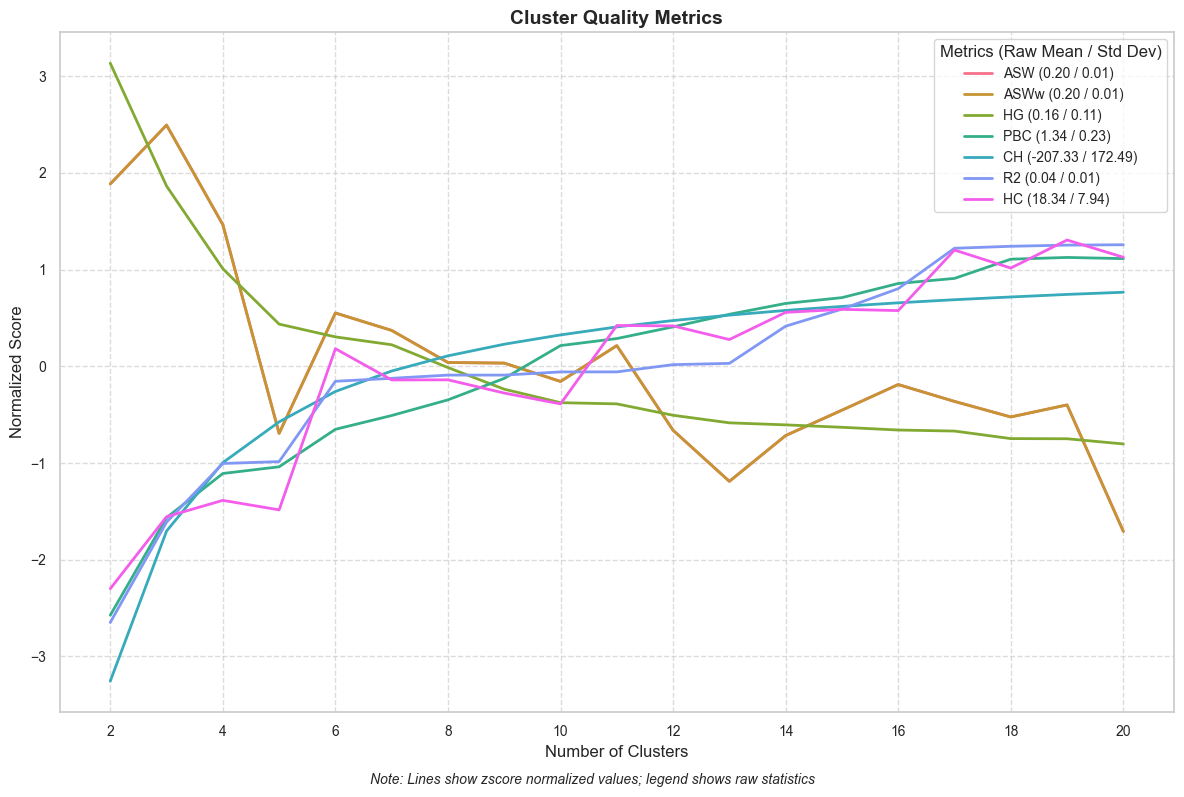

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW              3    2.494160       2.494160            1.0
1   ASWw              3    2.494160       2.494160            1.0
2     HG              2    3.133515       3.133515            1.0
3    PBC             19    1.125517       1.125517            1.0
4     CH             20    0.765607       0.765607            1.0
5     R2             20    1.256604       1.256604            1.0
6     HC             19    1.305603       1.305603            1.0


<Figure size 640x480 with 0 Axes>

In [5]:
cluster = Cluster(cat_distance_matrix, happiness_sequence.ids, clustering_method='ward')
# cluster.plot_dendrogram(xlabel="Individual", ylabel="Distance")

# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='cat_combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)

      Entity ID  Cluster ID
0             0           1
1             1           4
2             2           1
3             3           4
4             4           4
...         ...         ...
1533       1533           4
1534       1534           1
1535       1535           2
1536       1536           2
1537       1537           2

[1538 rows x 2 columns]
   Cluster  Count  Percentage
0        1    309       20.09
1        2    364       23.67
2        3    291       18.92
3        4    574       37.32


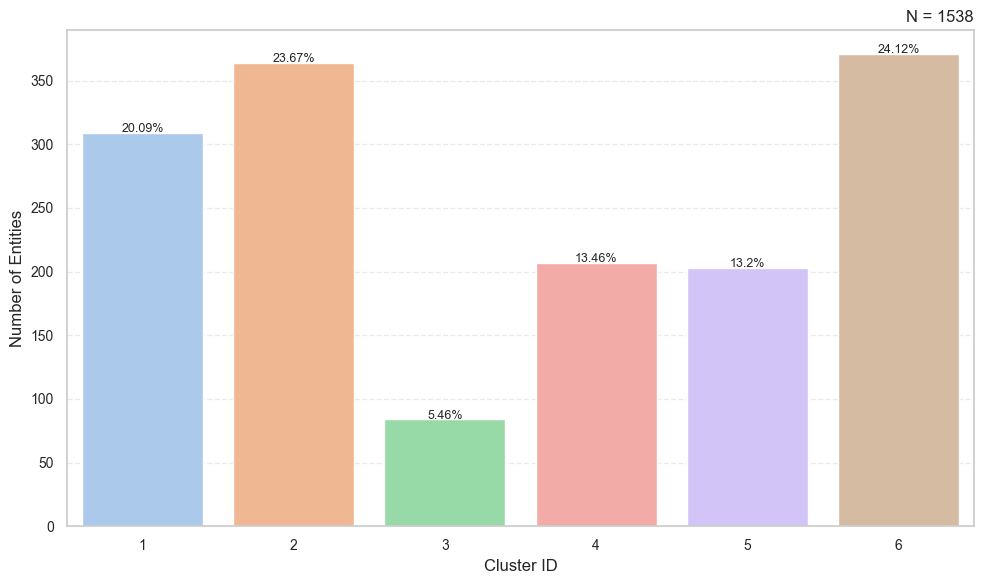

<Figure size 640x480 with 0 Axes>

In [6]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=4)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=4)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=6, save_as="cat_distribution.png", title=None)


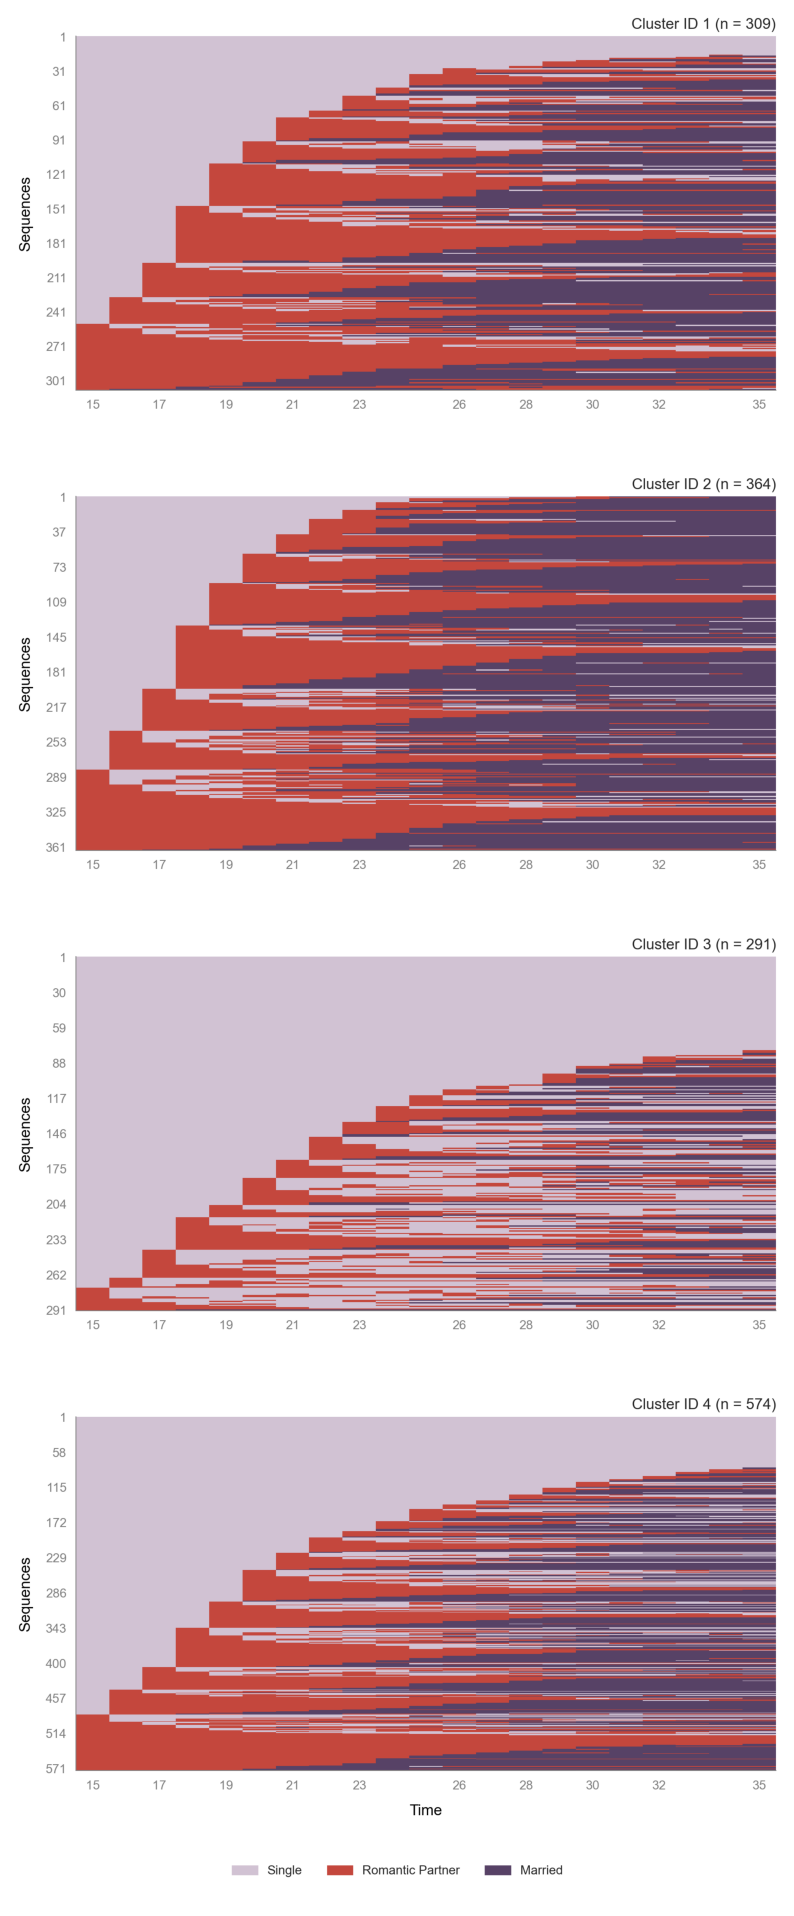

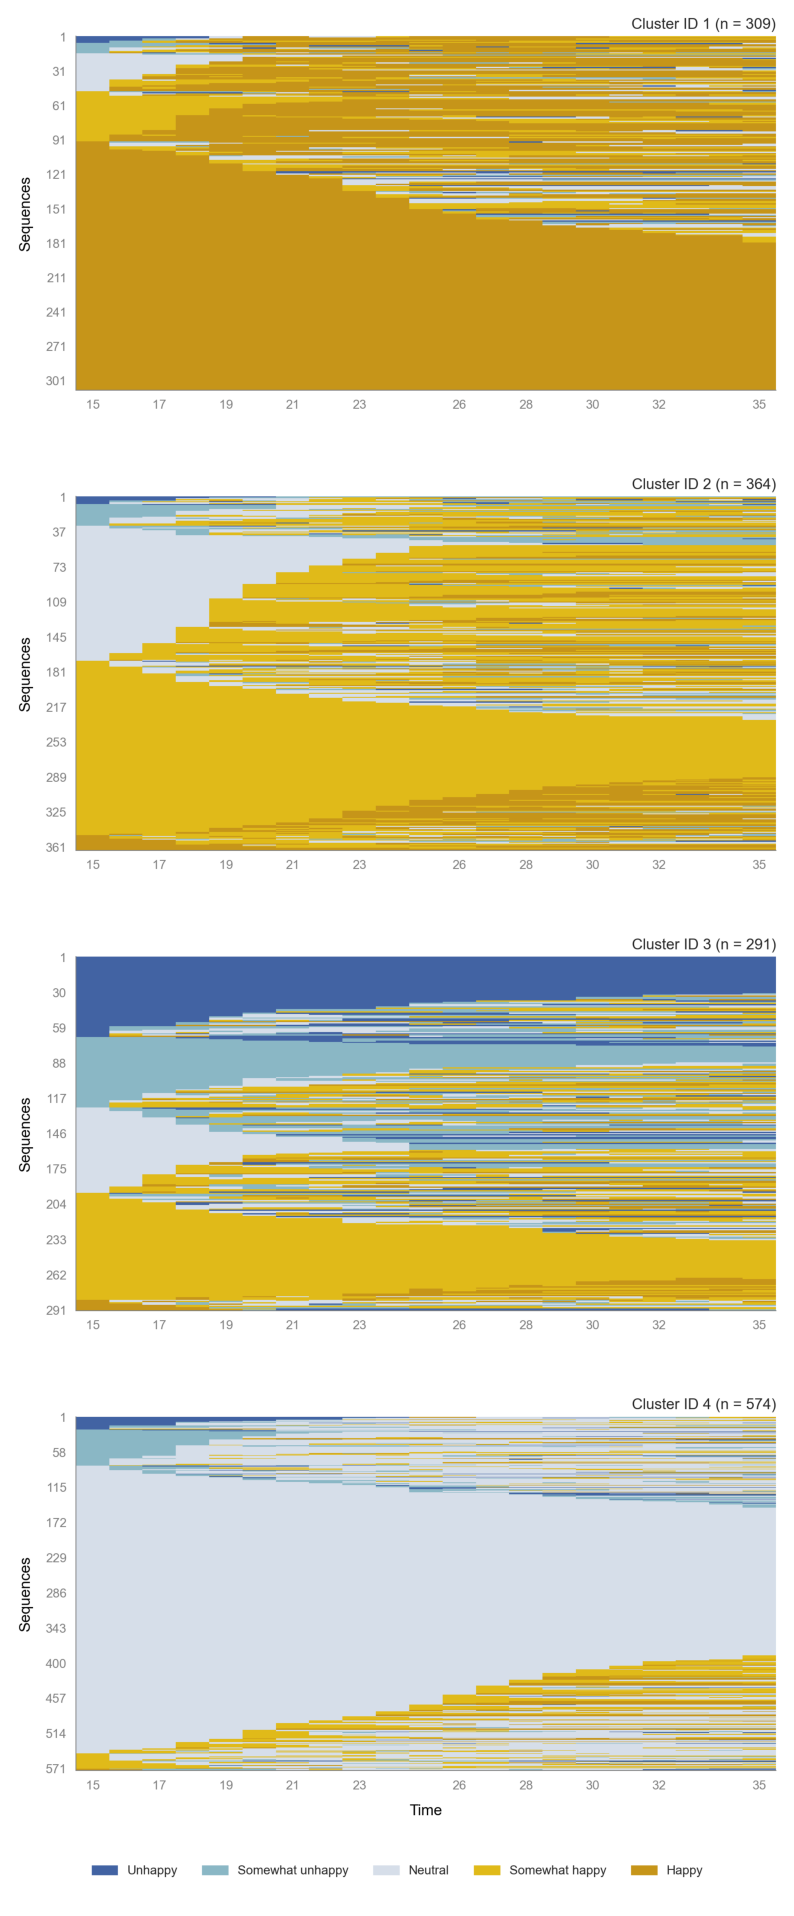

In [9]:
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=membership_table,
                    categories='Cluster ID',
                    ncols=1, # TODO: Âè™Â°´Ëøô‰∏™‰ΩÜÊ≤°ÊúâÂ°´nrowsÁöÑÊó∂ÂÄôÔºåÈúÄË¶ÅÊä•Èîô
                    nrows=4,
                    save_as='cat_family_cluster_index_plot')

plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=membership_table,
                    categories='Cluster ID',
                    ncols=1,
                    nrows=4,
                    save_as='cat_happiness_cluster_index_plot')